# Analyzing the COVID-19 Severity with respect to Various Variables
*Chenxu Robin Mao | 1008267475 | robin.mao@mail.utoronto.ca*

<br>

----
## Data Source:
*(Other references are in the Reference section.)*

- COVID-19 Global Confirmation Count/ Death Count: *https://github.com/CSSEGISandData/COVID-19*

- Global Population: *https://data.worldbank.org/indicator/SP.POP.TOTL*

- COVID-19 Variants: *https://www.kaggle.com/datasets/gpreda/covid19-variants*

- GDP per Capita: *https://data.worldbank.org/indicator/NY.GDP.PCAP.CD*

- GDP: *https://data.worldbank.org/indicator/NY.GDP.MKTP.CD*

- Dictatorship Index: *https://www.kaggle.com/datasets/mathurinache/democracy-dictatorship-index*

- Country Code: *https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes*

- Literacy Rate: *https://data.worldbank.org/indicator/SE.ADT.LITR.ZS*

- US State GDP: *https://www.kaggle.com/datasets/davidbroberts/us-gdp-by-state-19972020*

Detailed References in Reference section.

<br>

----
## Outline

- [Preparation](#preparation)
    - [Module Installation](#module-installation)
    - [Libraries Loading](#libraries-loading)
- [Introduction](#introduction)
- [Project One](#project-one)
    - [Data Cleaning](#data-cleaning-project-one)
    - [Summary Statistics Tables](#summary-statistics-table-project-one)
    - [Plots](#plot-project-one)
- [Project Two](#project-two)
    - [Data Cleaning](#data-cleaning-project-two)
    - [Plots](#plots-project-two)
    - [Maps](#maps-and-interpretations-project-two)
- [Project Three](#project-three)
    - [Potential Data to Scrap](#potential-data-to-scrape)
    - [Potential Challenges](#potential-challenges)
    - [Scraping Data from a Website](#scraping-data-from-a-website)
    - [Visualizing the Scraped Dataset](#visualizing-the-scraped-dataset)
    - [Adding a New Dataset](#adding-a-new-dataset)
- [Final Project](#final-project)
    - [OLS Regression](#ols-regression)
    - [Regression Tree](#machine-learning-regression-trees-and-random-forecasts)
- [Conclusion](#conclusion)
- [References](#references)
        
<br>

-----
## Preparation

##### Module Installation

In [72]:
# uncomment following line to install
# ! pip install --upgrade pip
# ! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
# ! pip install matplotlib
# ! pip install qeds
# ! pip install geopandas
# ! pip install linearmodels
# ! pip install stargazer

This part is for module installation purposes.

<br>

##### Libraries Loading

In [73]:
# import pandas data module
import pandas as pd

# import geographic module
import geopandas as gpd

# import graphing module
import matplotlib.pyplot as plt
import numpy as np

# import Point for geo-graphing
from shapely.geometry import Point

# import regression modules
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

# import Stargazer to summarize
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

This part is for libraries loading purposes.

<br>

------
## Introduction

To date, the COVID-19 epidemic remains as a major global public health concern. With recent data showing the COVID-19 confirmation count reaching 671M with total death toll of 6.83M $^{(1)}$, with the daily new case count over 2000. There exist relevant literatures analyzing the COVID-19 severity from its spread in specific countries such as the following, 

*Fanelli, D., & Piazza, F. (2020). Analysis and forecast of COVID-19 spreading in China, Italy and France. Chaos, Solitons & Fractals, 134, 109761.*, in which the paper focuses on modelling the COVID-19 spread in China, Italy, France, analyzing its spreading pattern and create empirical mathematical models such as SIR model;


*Cramer, E. Y., Ray, E. L., Lopez, V. K., Bracher, J., Brennen, A., Castro Rivadeneira, A. J., ... & Georgescu, A. (2022). Evaluation of individual and ensemble probabilistic forecasts of COVID-19 mortality in the United States. Proceedings of the National Academy of Sciences, 119(15), e2113561119.*, in which the paper focuses on the COVID-19 mortality rate prediction in India using advanced statistical methods and neuronetwork;

*Alizadehsani, R., Alizadeh Sani, Z., Behjati, M., Roshanzamir, Z., Hussain, S., Abedini, N., ... & Islam, S. M. S. (2021). Risk factors prediction, clinical outcomes, and mortality in COVID‐19 patients. Journal of medical virology, 93(4), 2307-2320.*, in which the paper analyzes the risk factors of the COVID-19 and focus on the prediction of clinical outcomes;

However, none has analyzed its severity with respect to the COVID-19 mortality rate from a global perspective nor none focuses on the resulting factors of severity. As the COVID-19 severity (from the perspective of mortality rate and cumulative confirmation count) varying significantly around the globe, this report will focus on the global COVID-19 severity variation from an economic and mathematical perspective, analyzes on the potential resulting factors within and utilize statistical to create model. Used datasets provided by John Hopkins University, World Bank, Kaggle and more data sources [here](#data-source).

Throughout this report, contents from project one and project two will mainly focus on analyzing the COVID-19 severity from its mortality rate while project three will focus on analyzing from the COVID-19 confirmation count. These terms will be formally defined later.

> More COVID-19 data could be found here: *https://covid19.who.int*

<br>

----
## Project One

### Introduction: Project One

The goal of project one is to find **economic factors** that affect the COVID-19 mortality rate and analyze its effect on the severity variation. 

Throughout project one, the Y-variable will be the `COVID-19 mortality rate` while the X-variables vary among the research questions. As being infected by COVID-19 is not as severe as a fatal result, COVID-19 mortality rate is determined to be a relatively unbiased estimator for its severity measurement. 

The choices of X-variables includes the cumulative COVID-19 confirmation count, the cumulative death toll, countries and Omicron proportion. To ensure the integrity, more detailed summaries are broken down and given in the beginning of each research question.

The project one research questions are,

##### 1. The COVID-19 Confirmation Count, Death Toll and their Intuitive Relation with respect to the COVID-19 Mortality Rate

*$\color{gray}{\text{"Do there exist similar trends between confirmation count and mortality rate? How about death toll and mortality rate?"}}$*

Definitions are provided as below, 

> $\color{red}{\text{ COVID-19 Mortality Rate}}$: the estimated probability *(sampled from the population)* that a COVID-19-infected individual will result in disease-related mortality.

> $\color{red}{\text{ Confirmation Number}}$: the population count of clinical diagnosed infected individuals. Can be referred to as *"Case Count"*, *"Confirm Count"*, etc.

The X-variables here are `the COVID-19 confirmation count` and `the COVID-19 death toll`, this project will visualize and provide implications on the hypothetical distribution similarities among the variables due to the clinical nature of which one individual has to be infected to be resulted from a viral-related fatality. Thus, the hypothesis here is that the data will show a somewhat significant relation between the confirmation count and mortality rate, as well as the death toll and the latter. The relation is hypothesized to be the mortality rate will increase overtime as the confirmation count rises, vice versa and the mortality rate will increase overtime as the death toll rises, vice versa.


##### 2. The COVID-19 Mortality among Continents

*$\color{gray}{\text{ "Does mortality rate vary among countries?"}}$*

As different countries had different response when the epidemic hit, and it is obvious that to date some countries did a great job while some did not. A recent report shows that there are countries like the US with 104,393,464 confirmation count to date $^{(6)}$, and there are countries like Tokelau with a confirmation count of 5. This vast difference among the categorical data is interesting. As the countries pool is too large to be analyzed within one research question, we will focus on the mortality rate among continents instead.

Thus, the initial assumption is **different continents will have different mortality rates due to the variations in exogenous factors**. 

To calculate the individual mortality rate among different countries, we have to merge a new dataset. We first need to clean the data set to get the variables we want.


##### 3. GDP per Capita vs Mortality Rate

*$\color{gray}{\text{ "What is the relation between GDP per capita and the COVID-19 mortality rate?"}}$*

Why is GDP per capita chosen instead of GDP? Because GDP is not representative enough for quality of life and individual wealth, and theoretically nations with more personal wealth can provide its citizens better medical resources, public sanitization, etc., resulting in a hypothetical trend that a higher GDP per capita will result in a lower mortality rate. (However, GDP will be covered in later project.) 

To enhance our understanding in the topic, let us find the countries with most GDP per capita and least GDP per capita first.

##### 4. Omicron Variant Proportion and the Mortality Rate

*$\color{gray}{\text{ "Do countries with higher omicron variant proportion have a higher mortality rate?"}}$*

Let us define the new term.

> $\color{red}{\text{ Omicron Variant Proportion}}$: the estimated proportion of Omicron COVID-19 case out of the total COVID-19 confirmation count. Can be referred to as *"omicron proportion"*, etc.

To date, there exist more than 50 COVID-19 variants, according to data from John Hopkins Medicine $^{(7)}$. Each time COVID-19 mutates, it becomes more lethal or easier to spread. Thus do countries with higher omicron variant proportion have a higher mortality rate? The initial hypothesis is that **countries with a higher omicron variant proportion will have a higher mortality rate** because the omicron variant is more lethal than the initial COVID-19 virus.

The x variable here is the omicron proportion calculated from variants and the global confirmation count data set, and the y variable is the mortality proportion calculated from the global death data set and the population data set.

<br>

### Data Cleaning: Project One

##### Data Cleaning: The COVID-19 Confirmation Count, Death Toll and their Intuitive Relation with respect to the COVID-19 Mortality Rate

In [74]:
# data on global COVID-19 confirmation count
global_confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# data on global COVID-19 mortality count
global_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

### get our target variable

# select all case count from thed DataFrame
global_confirm_cum = global_confirm.iloc[:,4:]
global_death_cum = global_death.iloc[:,4:]

# sum up the total case count
global_confirm_cum = global_confirm_cum.sum()
global_death_cum = global_death_cum.sum()

In this case, the X variables include *confirmation count*, *death count*, and the Y variable is the *mortality rate*.

After cleaning, the *global_confirm_cum* dataset sums up the global COVID-19 cumulative case count and the *global_death_cum* dataset sums up the global COVID-19 cumulative mortality count.

##### Data Cleaning: The COVID-19 Mortality among Continents

In [1]:
# clean the population DataFrame
population = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')
population = population.drop([266,267,268,269,270])
population = population.rename(columns= {'Country Name': 'Country/Region'})
population = population.loc[:,['Country/Region','2022 [YR2022]']]

### calculating table regarding each countries' mortality rate

# reset index and choose death count columns
country_death = global_death.set_index('Country/Region').iloc[:,3:]
country_total_death = country_death.loc[:,['12/23/22']]
country_total_death = country_total_death.rename(columns={'12/23/22':'Death Toll'})

# sum up duplicates(different provinces within the same country)
country_total_death = country_total_death.groupby([country_total_death.index]).sum()

# reset index
country_total_death = country_total_death.reset_index()

# merge the data sets
country_death_population = pd.merge(country_total_death, population, how = 'left', on = 'Country/Region')

# drop the na values
country_death_population = country_death_population.dropna()

# rename the column
country_death_population = country_death_population.rename(columns = {'2022 [YR2022]': 'Population'})

NameError: name 'pd' is not defined

The X-variable we are using here is **continent names**, while the Y-variable is their individual **mortality rate** calculated from before.

##### Data Cleaning: GDP per Capita vs Mortality Rate

In [76]:
# GDP per capita data
GDP = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4888903.csv', on_bad_lines='skip')

### data cleaning
country_death_population_GDP = country_death_population.copy()

# GDP = GDP[['Country Name']]
if len(GDP.T) >= 5:
    GDP = GDP[['Country Name', '2021']]

country_death_population_GDP = pd.merge(GDP, country_death_population_GDP, left_on='Country Name', right_on ='Country/Region',how='inner')
country_death_population_GDP = country_death_population_GDP.drop(columns='Country/Region').rename(columns={'2021':'GDP per Capita'})
country_death_population_GDP['Mortality Rate (%)'] = (country_death_population_GDP['Death Toll'].astype(int) / country_death_population_GDP['Population'].astype(int))*100

We now merged the table *country_death_population* with the GDP per capita data set.

The X variable is country and the Y variable is mortality rate.

##### Data Cleaning: Omicron Variant Proportion and the Mortality Rate

Again, let us clean the two datasets, calculate the values and take a glimpse first.

In [77]:
# global variants data
variants = pd.read_csv('covid-variants.csv')

### glimpse

variants.head(3)

### merge and calculate the value

country_confirm = global_confirm.set_index('Country/Region').iloc[:,3:]
country_total_confirm = country_confirm.loc[:,['12/31/20']]
country_total_confirm = country_total_confirm.rename(columns={'12/31/20':'Confirm Toll'})
country_total_confirm = country_total_confirm.groupby([country_total_confirm.index]).sum()
country_total_confirm = country_total_confirm.reset_index()
country_death_population = country_death_population.rename(columns={'Country':'Country/Region'})
country_death_confirm_population = pd.merge(country_death_population, country_total_confirm, on = 'Country/Region', how = 'inner')

variants_df = variants.loc[:,['location','date','variant']]
variants_df = variants_df.rename(columns={'location':'Country/Region','date':'Date','variant':'Type'})
omicron_df = variants_df[variants_df.Type == 'Omicron']
omicron_df = omicron_df.rename(columns={'Country/Region':'Country'})
country_death_confirm_population = country_death_confirm_population.rename(columns={'Country/Region':'Country'})

As we can see, the variants data set contains info such as location, date, variant types, sequence info, etc. Sequences and dates (which will be summed up later) are not useful towards our question thus the variables we are using from this dataset are *location and variant*.

<br>

### Summary Statistics Table: Project One

##### Summary Statistics Table: The COVID-19 Confirmation Count, Death Toll and their Intuitive Relation with respect to the COVID-19 Mortality Rate

To take a glimpse, the dataset time horizon is divided into 12 seasonal intervals from 2020 to 2022. Seasonal changes for both confirmation count and death toll are recorded to capture the hypothetical relation among the variables.

Personal experience suggests that the data will show a significant increase in the confirmation count first, and then a slowed change. The death toll change will increase initially and will have a sudden drop down at some point due to mass vaccination (or herd immunology). The expectation is *mortality rate will rise with the confirmation count before the sudden drop and shows no relation afterwards.*

In [78]:
### Summary Statistics Table

# select seasonal case count and mortality count data from 2020 to 2022 from the source
seasonal_confirm = global_confirm[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

seasonal_death = global_death[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

seasonal_confirm_cum = global_confirm_cum[['3/1/20','6/1/20','9/1/20','12/1/20',
                                   '3/1/21','6/1/21','9/1/21','12/1/21',
                                   '3/1/22','6/1/22','9/1/22','12/1/22']]

# create a new DataFrame that contains seasonal case count and mortality count data
seasonal_newcase_death = pd.DataFrame({
    '3/1/20': [sum(seasonal_confirm['3/1/20']),
                   sum(seasonal_death['3/1/20'])],
    '6/1/20': [sum(seasonal_confirm['6/1/20'])-sum(seasonal_confirm['3/1/20']),
                   sum(seasonal_death['6/1/20'])-sum(seasonal_death['3/1/20'])],
    '9/1/20': [sum(seasonal_confirm['9/1/20'])-sum(seasonal_confirm['6/1/20']),
                   sum(seasonal_death['9/1/20'])-sum(seasonal_death['6/1/20'])],
    '12/1/20': [sum(seasonal_confirm['12/1/20'])-sum(seasonal_confirm['9/1/20']),
                   sum(seasonal_death['12/1/20'])-sum(seasonal_death['9/1/20']),],
    
    '3/1/21': [sum(seasonal_confirm['3/1/21'])-sum(seasonal_confirm['12/1/20']),
                   sum(seasonal_death['3/1/21'])-sum(seasonal_death['12/1/20'])],
    '6/1/21': [sum(seasonal_confirm['6/1/21'])-sum(seasonal_confirm['3/1/21']),
                   sum(seasonal_death['6/1/21'])-sum(seasonal_death['3/1/21'])],
    '9/1/21': [sum(seasonal_confirm['9/1/21'])-sum(seasonal_confirm['6/1/21']),
                   sum(seasonal_death['9/1/21'])-sum(seasonal_death['6/1/21'])],
    '12/1/21': [sum(seasonal_confirm['12/1/21'])-sum(seasonal_confirm['9/1/21']),
                   sum(seasonal_death['12/1/21'])-sum(seasonal_death['9/1/21'])],
    
    '3/1/22': [sum(seasonal_confirm['3/1/22'])-sum(seasonal_confirm['12/1/21']),
                   sum(seasonal_death['3/1/22'])-sum(seasonal_death['12/1/21'])],
    '6/1/22': [sum(seasonal_confirm['6/1/22'])-sum(seasonal_confirm['3/1/22']),
                   sum(seasonal_death['6/1/22'])-sum(seasonal_death['3/1/22'])],
    '9/1/22': [sum(seasonal_confirm['9/1/22'])-sum(seasonal_confirm['6/1/22']),
                   sum(seasonal_death['9/1/22'])-sum(seasonal_death['6/1/22'])],
    '12/1/22': [sum(seasonal_confirm['12/1/22'])-sum(seasonal_confirm['9/1/22']),
                   sum(seasonal_death['12/1/22'])-sum(seasonal_death['9/1/22'])]
                       },
    index = ['new confirm', 'new death']
)

# calculate the seasonal mortality rate change
seasonal_newcase_death.loc['mortality rate (%)'] = (seasonal_newcase_death.loc['new death'] / seasonal_confirm_cum) * 100
seasonal_newcase_death = seasonal_newcase_death.T

# convert type
seasonal_newcase_death['new confirm'] = seasonal_newcase_death['new confirm'].astype(int)
seasonal_newcase_death['new death'] = seasonal_newcase_death['new death'].astype(int)

# rename index for a better view
seasonal_newcase_death.index = ['spring 2020', 'summer 2020', 'autumn 2020', 'winter 2020', 'spring 2021', 'summer 2021', 'autumn 2021', 'winter 2021', 
'spring 2022' , 'summer 2022', 'autumn 2022', 'winter 2022']

# set table caption
seasonal_newcase_death.style.set_caption('Table: Seasonal Mortality Rate and Confirmation Count from 2020 to 2022')

,new confirm,new death,mortality rate (%)
spring 2020,88402,3000,3.393588
summer 2020,6195178,406983,6.476929
autumn 2020,19518644,508255,1.969811
winter 2020,38234918,639130,0.998061
spring 2021,50846837,1084719,0.944186
summer 2021,56816155,1066379,0.621071
autumn 2021,47303623,851239,0.388687
winter 2021,44812388,696112,0.263863
spring 2022,175246419,738948,0.168301
summer 2022,91877412,323617,0.060952


> Note: The mortality rate refers to the ratio of new death toll over cumulative confirmation count as $Mortality Rate = \frac{Death Toll}{Confirmation Count}$, not death count over change in confirm count.

The chart above gives the seasonal global new confirm count and death toll between 2020 and 2022. We can see that the seasonal confirmation change *(new confirm)* has a significant growth from spring 2020 to spring 2022. The global mortality rate have a sudden increase in spring 2020, reaching its peak of over 6.47% around summer 2020, and is relatively stabilized since. Their increment trend does not seem to match.

The change in death count *(new death)* seems to peak around early 2021, while the mortality rate is still relatively significant. Nevertheless, the trend is too hard to tell given this table.

This quick glimpse *somehow* supports the null hypotheses; however, to ensure the precision, let us further investigate with detailed data instead of seasonal data.

<br>

##### Summary Statistics Table: The COVID-19 Mortality among Continents

In [79]:
# calculate the mortality rate
country_death_population['Death Toll'] = country_death_population['Death Toll'].astype(int)
country_death_population['Population'] = country_death_population['Population'].astype(int)
country_death_population['Mortality Rate'] = country_death_population['Death Toll'] / country_death_population['Population']
country_death_population['Mortality Rate (%)'] = country_death_population['Mortality Rate'] * 100
country_death_population = country_death_population.drop('Mortality Rate', axis = 1)

country_death_population.head(10).style.set_caption('Table: the Death Toll, Population, Mortality Rate of individual Countries')

,Country/Region,Death Toll,Population,Mortality Rate (%)
0,Afghanistan,7845,41128771,0.019074
1,Albania,3595,2800251,0.128381
2,Algeria,6881,44903225,0.015324
3,Andorra,165,79824,0.206705
4,Angola,1928,35588987,0.005417
6,Antigua and Barbuda,146,93763,0.155712
7,Argentina,130080,46050112,0.282475
8,Armenia,8712,2780469,0.313328
9,Australia,16940,25941598,0.065301
10,Austria,21360,8970982,0.238101



> Countries with no population data or with no covid report data is dropped in this session. Only countries that are present in both datasets are recorded.

> *Notice: As the World Bank population data was last updated on 12/23/22, the same date is chosen to record the death toll.*

The variation in mortality rate among countries is visible in the 10 heading of the data, which is a relatively unbiased estimator for continent COVID-19 mortality rate measurement as one is a subset of another. For instance, Armenia has a mortality rate of 0.313328%, which is approximately 16.43 times Afghanistan's of 0.019074%. 

Let us visualize the differences.

##### Summary Statistics Table: GDP per Capita vs Mortality Rate

In [80]:
country_death_population_GDP.head(10).style.set_caption('Countries with Different GDP per Capita and their Mortality Rate')

,Country Name,GDP per Capita,Death Toll,Population,Mortality Rate (%)
0,Afghanistan,368.754614,7845,41128771,0.019074
1,Angola,1953.533757,1928,35588987,0.005417
2,Albania,6492.872012,3595,2800251,0.128381
3,Andorra,42137.327271,165,79824,0.206705
4,United Arab Emirates,44315.554183,2348,9441129,0.024870
5,Argentina,10636.120196,130080,46050112,0.282475
6,Armenia,4966.513471,8712,2780469,0.313328
7,Antigua and Barbuda,15781.395702,146,93763,0.155712
8,Australia,60443.109165,16940,25941598,0.065301
9,Austria,53637.705711,21360,8970982,0.238101


The table above shows the variation in mortality rate for countries with different GDP per capita. For example, we have Australia with a high GDP per capita and a low mortality rate, but somehow we have Afghanistan, with a *relatively* low mortality rate and a low GDP per capita. Thus, we cannot conclude an exact trend from this data.

Let us make this into a bar plot to visualize the difference.

##### Summary Statistics Table: Omicron Variant Proportion and the Mortality Rate

In [81]:
# generate a loop to compare and input data
res = []
for i in country_death_confirm_population['Country']:
    j = omicron_df[omicron_df.Country == i].count().Country.astype(int)
    res.append(j)
    if j != 0:
        country_death_confirm_population.loc[country_death_confirm_population[country_death_confirm_population.Country == i].index,'Omicron Count'] = j
    else:
        country_death_confirm_population.loc[i,'Omicron Count'] = None
        
country_death_confirm_population = country_death_confirm_population.dropna(0)
country_death_confirm_population['Omicron Prop (%)'] = (country_death_confirm_population['Omicron Count'] / country_death_confirm_population['Confirm Toll']) * 100
country_death_confirm_population['Death Toll'] = country_death_confirm_population['Death Toll'].astype(int)
country_death_confirm_population['Population'] = country_death_confirm_population['Population'].astype(int)
country_death_confirm_population['Confirm Toll'] = country_death_confirm_population['Confirm Toll'].astype(int)
country_death_confirm_population['Omicron Count'] = country_death_confirm_population['Omicron Count'].astype(int)
country_death_confirm_population['Mortality Rate (%)'] = (country_death_confirm_population['Death Toll'] / country_death_confirm_population['Population']) * 100
country_death_confirm_population.reset_index(drop=True).head(10).style.set_caption('Table: Mortality Rate and Omicron Proportion of Countries')

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_1796/2415803029.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  country_death_confirm_population = country_death_confirm_population.dropna(0)


,Country,Death Toll,Population,Confirm Toll,Omicron Count,Omicron Prop (%),Mortality Rate (%)
0,Angola,1928,35588987,17553,28,0.159517,0.005417
1,Argentina,130080,46050112,1625514,44,0.002707,0.282475
2,Australia,16940,25941598,28425,44,0.154793,0.065301
3,Austria,21360,8970982,356063,43,0.012077,0.238101
4,Bahrain,1539,1472233,92675,29,0.031292,0.104535
5,Bangladesh,29438,171186372,513510,45,0.008763,0.017196
6,Belgium,33228,11621253,646496,45,0.006961,0.285924
7,Belize,688,405272,10776,24,0.222717,0.169763
8,Benin,163,13352864,3251,14,0.430637,0.001221
9,Bosnia and Herzegovina,16221,3233526,110985,36,0.032437,0.501651


> Notice: Countries that are not present in both datasets are dropped.

> The variant dataset was last updated on 12/31/20; thus that is where we slice our cumulative confirmation data.

The table above gives us the mortality rate, omicron proportion and other factors of countries. 

We can tell that countries with high mortality rates such as Argentina, have relatively low omicron proportions; and countries with low mortality rates such as Benin, have high omicron proportions. This is an interesting trend, let us further visualize this.

<br>

### Plot: Project One

##### Plot: The COVID-19 Confirmation Count, Death Toll and their Intuitive Relation with respect to the COVID-19 Mortality Rate

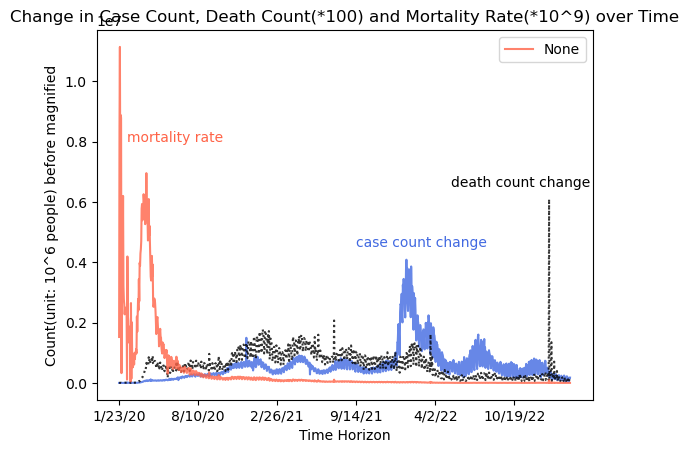

In [82]:
# convert cumulative count to daily change and drop the first observation
global_confirm_change = global_confirm_cum.diff().drop('1/22/20')
global_death_change = global_death_cum.diff().drop('1/22/20')
global_death_cum = global_death_cum.drop('1/22/20')
global_confirm_cum = global_confirm_cum.drop('1/22/20')

# calculating the mortality rate for global data
global_death_cum.loc['mortality rate'] = global_death_change / global_confirm_cum

# magnify the data to make trend more obvious

# global_death_change is magnified by 100
global_death_change_magnified = global_death_change * 100

# mortality rate is magnified by 1000000000:
    # assume there is 1000000000 individuals, extimate how many would result in COVID-19 related death
seasonal_newcase_death_magnified = global_death_cum.loc['mortality rate'] * 1000000000

# plotting
fig, ax = plt.subplots()

global_confirm_change.plot(ax=ax,legend=False,linestyle='-',color = 'royalblue',alpha=0.8)
ax.text(600,4500000,'case count change',color='royalblue')

global_death_change_magnified.plot(ax=ax,legend=False,linestyle='dotted',color = 'black',alpha=0.8)
ax.text(840,6500000,'death count change',color='black')

seasonal_newcase_death_magnified.plot(ax=ax, legend=True, linestyle='solid',color = 'tomato',alpha=0.8)
ax.text(20,8000000,'mortality rate',color='tomato')


# set labels
ax.set_ylabel('Count(unit: 10^6 people) before magnified')
ax.set_xlabel('Time Horizon')
ax.set_title('Change in Case Count, Death Count(*100) and Mortality Rate(*10^9) over Time')
ax.set_label(False)
plt.show()

> To analyze the trend, the death count is magnified by 100, and the mortality rate is magnified by 1 ${\times}$ $10^{9}$. This is reasonable as we are multiplying the values by a constant coefficient, and if there exists a relation (which will be unchanged after the magnification due to the nature of constant multiplication), it will be easier to tell.

The X variables chosen to test the hypotheses are death count and case count (based on time), and the Y variable is the mortality rate.

The exact daily data is graphed above. We can tell the mortality rate fluctuation ends around 8/10/20, which is before any significant fluctuation in the death change and the case change starting from the midpoint of 8/10/20 and 2/26/21. As well as the peak of the mortality rate lies between 1/23/20 and 8/10/20, while the case count peak lies between 9/14/21 and 4/2/22, and there still exist significant fluctuations after the peak.

Due to the significant distribution difference between the two variables, we can conclude that **data shows no significant relation between case count and the mortality rate**.

This can be reasoned as many countries enforced lockdowns when the mortality rate is high, resulting in a low case count, and they will end the quarantine if and only if the mortality rate is stabilized by exogenous factors such as mass vaccinations or herd immunity. For example, the Ontario government announced the end of lockdown on Nov.20, 2020 $^{(2)}$, when the mortality rate ended its fluctuation. It would be reasonable for the confirmation count to rise after people gain back rights to outside activities as there exist more social interactions, resulting in more individuals and more ways to spread the virus.


However, when the mortality rate rises between 1/23/20 and 8/10/20, the death count also has a relatively sudden increase. As the mortality rate goes down, the death count also has a downfall before 8/10/20. Thus, we conclude that **a rise in the death toll rate will lead to an increase in the COVID-19 mortality rate; however, there exist other factors that can result in a more significant impact (on the mortality rate)**.

<br>

##### Plot: The COVID-19 Mortality among Continents

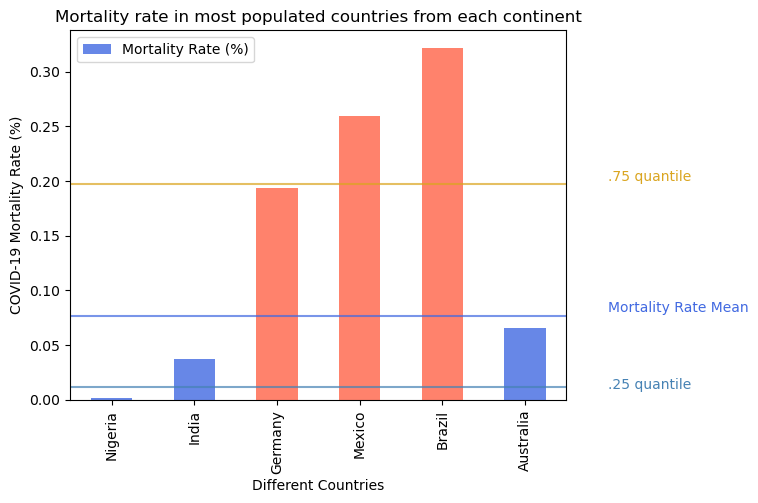

In [83]:
### plotting

# give barplot
fig, ax = plt.subplots()

# select the most populated country from each continent
country_death_population_2 = country_death_population.copy()
country_death_population_2 = country_death_population_2.reset_index(drop=True)
country_death_population_p = country_death_population_2.iloc[[115,70,58,101,22,8], :]

# calculating quantiles
quantile25 = country_death_population['Mortality Rate (%)'].quantile(.25)
quantile50 = country_death_population['Mortality Rate (%)'].quantile(.50)
quantile75 = country_death_population['Mortality Rate (%)'].quantile(.75)

country_death_population_plot = country_death_population_p.loc[:,['Country/Region','Mortality Rate (%)']]
mortality_mean = country_death_population_plot['Mortality Rate (%)'].mean()

country_death_population_plot.plot.bar(ax=ax,x='Country/Region', y='Mortality Rate (%)',alpha = 0.8, color=['royalblue','royalblue','tomato','tomato','tomato','royalblue'])

ax.set_ylabel('COVID-19 Mortality Rate (%)')
ax.set_xlabel('Different Countries')
ax.set_title('Mortality rate in most populated countries from each continent')

plt.axline(xy1=[0,quantile25],xy2=[6,quantile25],color='steelblue',alpha=0.7)
ax.text(6,0.01,'.25 quantile',color='steelblue')

plt.axline(xy1=[0,quantile50],xy2=[6,quantile50],color = 'royalblue',alpha = 0.7)
ax.text(6,0.08,'Mortality Rate Mean',color='royalblue')

plt.axline(xy1=[0,quantile75],xy2=[6,quantile75],color='goldenrod',alpha=0.7)
ax.text(6,0.2,'.75 quantile',color='goldenrod')
plt.show()

> Remember our goal is to determine **whether the mortality rate is differed among countries.**

The barplot above visualizes the difference in mortality rate among the most populated countries in each continent. Note that the 0.75 quantile, mean and the 0.25 quantile are calculated using the initial dataset instead of the ones shown on the graph. We can see that the mortality rate is significantly higher in some countries such as Brazil, exceeding the 0.75 quantile; on the other hand, we can see Nigeria with a mortality rate lower than the 0.25 quantile. 

Thus, we can see that the differentiation in mortality rate is significant; thus we can conclude that **the mortality rate does vary among different continent**. However, this still does not answer the research question -

**"But why?** Why do some countries have a large mortality rate while others can bring it down?"

For now, let us assume the epidemic is strongly related to the economic development of a nation.

Thus, to further investigate this topic, let us ask another question: 

**"Does the individual wealth of a nation affect its COVID-19 mortality rate? If so, how?"**

Thus let us move further into the relation between **GDP per capita** and the **mortality rate**.

##### Plot: GDP per Capita vs Mortality Rate

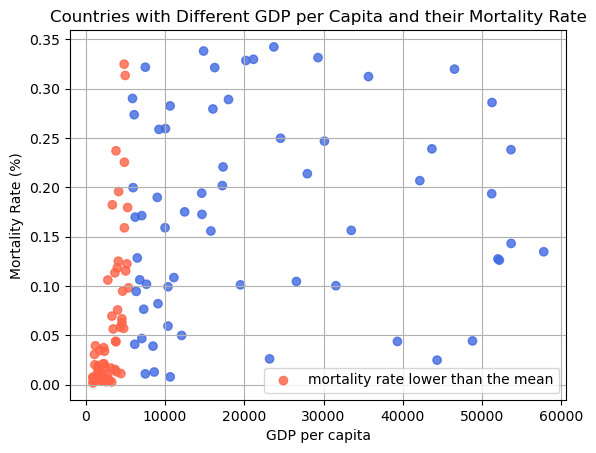

In [84]:
### give scatterplot

fig, ax = plt.subplots()

# GDP per capita quantiles
quantile25 = country_death_population_GDP['GDP per Capita'].quantile(.25)
quantile50 = country_death_population_GDP['GDP per Capita'].quantile(.50)
quantile75 = country_death_population_GDP['GDP per Capita'].quantile(.75)

# drop the outliners
country_death_population_GDP_2 = country_death_population_GDP.sort_values('Mortality Rate (%)', ascending=False).reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_population_GDP_2 = country_death_population_GDP_2.sort_values('Mortality Rate (%)').reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_population_GDP_2 = country_death_population_GDP_2.sort_values('GDP per Capita', ascending=False).reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_population_GDP_2 = country_death_population_GDP_2.sort_values('GDP per Capita').reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])

colors = ['tomato' if i<quantile50 else 'royalblue' for i in country_death_population_GDP_2['GDP per Capita']]
plot = plt.scatter(x=country_death_population_GDP_2['GDP per Capita'], y=country_death_population_GDP_2['Mortality Rate (%)'], color=colors,alpha=0.8)
ax.set_label('123')
ax.grid(True)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Mortality Rate (%)')

ax.legend([plot],['mortality rate lower than the mean'])
plt.title('Countries with Different GDP per Capita and their Mortality Rate')
plt.show()

The scatterplot above visualizes the mortality rate difference between countries with different GDP per capita. From the graph, we can see that countries with a low GDP per capita tend to have a low mortality rate, while countries with higher GDP per capita tend to have a weaker, insignificant relation between the two variables. 

Thus, we can conclude **countries with low GDP per capita have the lowest mortality rate while countries with higher GDP per capita tend to have a insignificant relation between their GDP per capita and mortality rate.** This contradicts the initial hypothesis.

One way to explain this is that countries with medium GDP per capita are mainly developing countries, where people work the hardest (from my personal observation). Thus the people put less attention into health. On the other side, countries with low GDP per capita tend to have a more dictatorial government (which will be analyzed in project two) where the citizens are banned from going out during the pandemic, resulting in a lower mortality rate.

##### Plot: Omicron Variant Proportion and the Mortality Rate

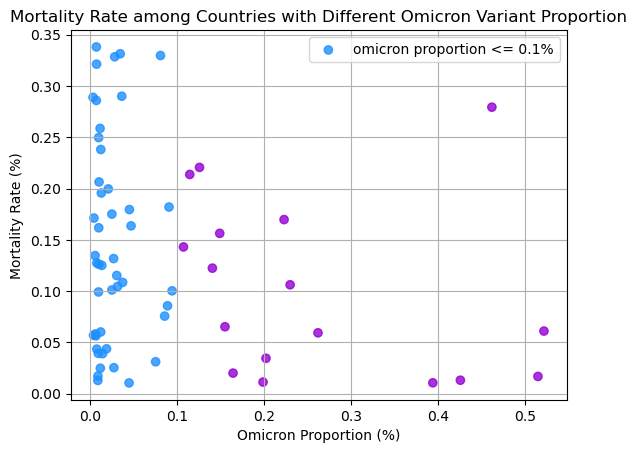

In [85]:
### plot

fig, ax = plt.subplots()

# drop the outliners
country_death_confirm_population_2 = country_death_confirm_population.sort_values('Mortality Rate (%)', ascending=False).reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_confirm_population_2 = country_death_confirm_population_2.sort_values('Mortality Rate (%)').reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_confirm_population_2 = country_death_confirm_population_2.sort_values('Omicron Prop (%)', ascending=False).reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])
country_death_confirm_population_2 = country_death_confirm_population_2.sort_values('Omicron Prop (%)').reset_index(drop=True).drop(
    index=[0,1,2,3,4,5,6,7,8,9,10])


colors = ['dodgerblue' if i<0.1 else'darkviolet' for i in country_death_confirm_population_2['Omicron Prop (%)']]
plot = plt.scatter(x = country_death_confirm_population_2['Omicron Prop (%)'], y = country_death_confirm_population_2['Mortality Rate (%)'], color = colors, alpha = 0.8)
ax.grid(True)
ax.set_xlabel('Omicron Proportion (%)')
ax.set_ylabel('Mortality Rate (%)')
ax.legend([plot], ['omicron proportion <= 0.1%'])
plt.title('Mortality Rate among Countries with Different Omicron Variant Proportion')
plt.show()

For each individual observation (country), the x variable is the omicron proportion and the y variable is the mortality rate.

The graph above provides an intuitive relation between a country's mortality rate and its omicron proportion. We can tell the distribution is shaped similarly to a negative log function or *a typical exponential distribution*. This allows us to conclude.

From the data given above, we can conclude the relation between the country's omicron proportion and its mortality rate as: 

**Most countries have both a low omicron proportion and a low mortality rate. Countries with a high omicron proportion tend to have a low mortality rate, and countries with a low omicron proportion tend to have a more unstable mortality rate distribution.**

<br>

-----
## Project Two

*$\color{gray}{\text{ "Economic factors play important roles regarding the global COVID-19 mortality rate variation among countries." }}$*

### The message

As an answer to project one, economic factors such as GDP per capita result in variation in the mortality rate. For example, we have Peru with 665.53 mortality cases over 100,000 population, yet we have Burudi with a COVID-19 mortality rate of 0.1% $^{(8)}$. Thus as this is an economic course, I wonder what other **economic factors** will result in the variation in COVID-19 mortality rate. Thus, let us further specify the initial research question into the main message of project two:

*$\color{tomato}{\text{ "Economic factors play important roles regarding the global COVID-19 mortality rate variation among countries." }}$*

As the message encodes, we will focus on the mortality change related to economic factors. The X-variables are the **economic factors** of a country, and the Y-variable is the **mortality rate**. Moreover, we will specify the mortality rate in countries with high and low population. Let us specify the message into the following sub-sections:
<br>

##### **1. The role of GDP regarding the mortality rate variation among countries**

We have researched the role of **GDP per capita** concerning the COVID-19 mortality rate in project one. The conclusion is:

*Countries with low GDP per capita have the lowest mortality rate. Countries with the highest GDP per capita have the second lowest mortality rate, and countries with medium GDP per capita have the highest mortality rate.*

Thus, as another well-known economic factor, project two will start by showing how a country's **GDP** affects its COVID-19 mortality rate.

**Message**

*In countries with large population, as the GDP increases, the mortality rate tends to decrease. Its trendline is more inelastic than less populated countries, as well as it has more outliners in both GDP and mortality rate.*

*On the other hand, in countries with a small population, an GDP increases raise the mortality rate. Countries with a small population also tend to have a lower mortality rate and GDP.*

#### **2. The role of the governmental mode regarding the mortality rate variation among countries**

Governmental mode is an important categorical factor resulting in mortality rate variation among countries, as it determines essential quarantine policies directly. My personal experience also suggests that in countries with a more dictatorial government (China), the overall quarantine enforcement policy is much stricter than in countries with a more democratic government. Thus with the *Democracy-Dictatorship index*, we found the relations between the governmental mode and the COVID-19 mortality rate in both the more populated and less populated countries.

**Message**

*In countries with a higher population, parliamentary democratic governments minimize the mortality rate and military dictatorship governments maximize the mortality rate. On the other hand, in countries with a lower population, royal dictatorship governments minimize the mortality rate, and civilian dictatorship governments maximize the mortality rate.*

#### **3. The role of literacy rate regarding the mortality rate variation among countries**

Another crucial economic factor regarding the mortality rate of a country is its **literacy rate**, as a higher literacy rate is resulted from better public education, which directly improves public health through educating people and indirectly through having more medical staff.

**Message**

*Both high-population countries and low-population countries share a similar decreasing trend: an increase in the literacy rate decreases the mortality rate. However, the difference is not relatively significant.*

<br>

### Data Cleaning: Project Two

##### Data Cleaning: The role of GDP regarding the mortality rate variation among countries

In [86]:
# country_confirm: cumulative confirmation count data
country_confirm = global_confirm.loc[:,['Country/Region','2/28/23']]
country_confirm = country_confirm.rename({'Country/Region':'Country', '2/28/23':'Cumulative Confirmation'},axis=1).dropna()

# country_death: cumulative mortality case data
country_death = global_death.loc[:, ['Country/Region', '2/28/23']]
country_death = country_death.rename({'Country/Region':'Country', '2/28/23':'Cumulative Death'}, axis=1).dropna()

# merge two data sets to calculate the mortality rate
country_mortality_rate = pd.merge(country_confirm, country_death, on='Country', how='inner')
country_mortality_rate = country_mortality_rate.groupby('Country').sum()
country_mortality_rate['Mortality Rate (%)'] = (country_mortality_rate['Cumulative Death'] / country_mortality_rate['Cumulative Confirmation']) * 100

# merge data with population
population = population.rename({'Country/Region':'Country', '2022 [YR2022]':'Population'}, axis=1)
country_mortality_rate = pd.merge(country_mortality_rate, population, on='Country', how='inner')

# type conversion
country_mortality_rate['Population'] =  country_mortality_rate['Population'].astype(int)

Now we should get a data set with the country name, cumulative confirmation count, cumulative mortality count and mortality rate based on it. Now let us merge it with the GDP data from the World Bank.

##### Merge with GDP Data

In [87]:
# read the csv
country_GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4898871.csv', on_bad_lines='skip')

# clean and merge
country_GDP = country_GDP.loc[:,['Country Name', '2021']].dropna().rename({'Country Name':'Country', '2021':'GDP'},axis=1)
country_MR_GDP = pd.merge(country_mortality_rate, country_GDP, on='Country', how='inner').dropna()

Now we should get *country_MR_GDP* as a dataset with Country Name, Cumulative Confirmation Count, Cumulative Death Count, Mortality Rate (in percentage %), Population and GDP.

Remember for this project, we group countries into high and low populations.

Let us first define what is a **"High population"**. 

We have to define the standard as Google shows no credible resource on the answer. We first exclude countries with the top 10% population and the bottom 10% population (to stabilize the variance), then take the mean and round up to an int type.

In [88]:
# define the population standard
df = country_mortality_rate.sort_values('Population', ascending=False).reset_index(drop=True).iloc[17:170-17,:].reset_index(drop=True)
pop_standard = int(df['Population'].mean())
print(pop_standard)

14049687


This allows us to define the following terms for this project:

> $\color{red}{\text{High Population}}$: Countries with a population higher than 14049687 is considered high population, which is the mean for the data set population without the 10% edge values (no top 10% population & no bottom 10% population).

> $\color{red}{\text{Low Population}}$: Countries that are not considered to have a high population.

*Note: the top 10% and the bottom 10% are excluded only for population standard calculation. They are still a part of the data set.*

<br>

##### Data Cleaning: The role of the governmental mode regarding the mortality rate variation among countries

In [89]:
# load data sets
govt = pd.read_csv('Democracy-Dictatorship_Index.csv', on_bad_lines='skip')
country_codes = pd.read_csv('wikipedia-iso-country-codes.csv', on_bad_lines='skip')

Unfortunately, the dictatorship index data set is written in country codes. Thus, we have first to merge it with the country code data set.

In [90]:
# loop population status among countries
for i in range(len(country_mortality_rate)):
    if int(country_mortality_rate.loc[i, 'Population']) >= pop_standard:
        country_mortality_rate.loc[i, 'Population Status'] = 'High'
    else:
        country_mortality_rate.loc[i, 'Population Status'] = 'Low'

# merge
df = pd.merge(govt, country_codes, left_on='Regime', right_on='Alpha-3 code', how='inner')

# select the columns necessary
if 'Regime' in df:
    df = df.loc[:, ['Type', 'Subtype', 'English short name lower case']]

# rearrange columns and rename
df = df[['English short name lower case', 'Type', 'Subtype']].rename(columns={'English short name lower case':'Country'})

# merge mortality rate data set with dictatorship index
country_MR_govt = pd.merge(country_mortality_rate, df, on='Country', how='inner')
country_MR_govt = country_MR_govt.rename(columns={'Type':'Governmental Type'})

# rearrange order and cut off
country_MR_govt = country_MR_govt[['Country', 'Population Status', 'Governmental Type', 'Subtype', 'Mortality Rate (%)']]

Now we have merged three data set to get what we want. 

The *country_MR_govt* data set contains Country name, Population status, Governmental type, Subtype, Mortality Rate.

##### Data Cleaning: The role of literacy rate regarding the mortality rate variation among countries

In [91]:
# read the data set
LR = pd.read_csv('API_SE.ADT.LITR.ZS_DS2_en_csv_v2_4900230.csv', on_bad_lines='skip')
LR = LR.loc[:, ['Country Name', '2021']].dropna().reset_index(drop=True)

# merge the data sets
country_LR_MR = pd.merge(country_mortality_rate, LR, left_on='Country', right_on='Country Name', how='inner')
country_LR_MR = country_LR_MR[['Country', 'Population Status', 'Mortality Rate (%)', '2021']]
country_LR_MR = country_LR_MR.rename(columns={'2021':'Literacy Rate (%)'})

At this point, the *LR* data set, which stands for *Literacy Rate*, should contain Country name, Population status, Mortality rate, Literacy rate.

<br>

### Plots: Project Two

##### Plots: The role of GDP regarding the mortality rate variation among countries

As a project for an economic course, we should all know the difference between *GDP per capita* and *GDP*. Although their names are similar, *GDP per capita* is a measurement of individual wealth and *GDP* is a measurement of national aggregate output. 

For this part, we analyze the relation between *a countries's aggregate development* in respect to the COVID-19 mortality rate (instead of individual wealth analyzed in project one). My hypothesis is that countries with higher GDP could have a lower mortality rate as they have more public health funding, vice versa.

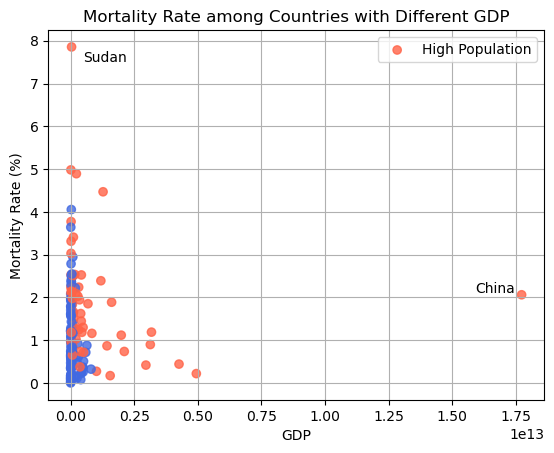

In [92]:
# define population status for the entire data set
for i in range(len(country_MR_GDP)):
    if int(country_MR_GDP.loc[i,'Population']) >= pop_standard:
        country_MR_GDP.loc[i, 'Population Status'] = 'High'
    else:
        country_MR_GDP.loc[i, 'Population Status'] = 'Low'

# plotting
fig, ax = plt.subplots()
colors = ['tomato' if i=='High' else 'royalblue' for i in country_MR_GDP['Population Status']]
plt.scatter(x=country_MR_GDP['GDP'], y=country_MR_GDP['Mortality Rate (%)'],color=colors,alpha=0.8)
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('GDP')
plt.title('Mortality Rate among Countries with Different GDP')
ax.text(15900000000000,2.1,'China')
ax.text(500000000000, 7.5, 'Sudan')
ax.legend(['High Population'])
plt.autoscale()
plt.show()

> Note: the outliners **ARE MOVED** later!!!

Before we set the limit, we can see **countries with high population** has two outliners:

**China**, with its extremely high GDP and **Sudan**, with its extremely high mortality rate.

The outliners are making the graph too compact. Let us now set limits for the graph and find the trend.

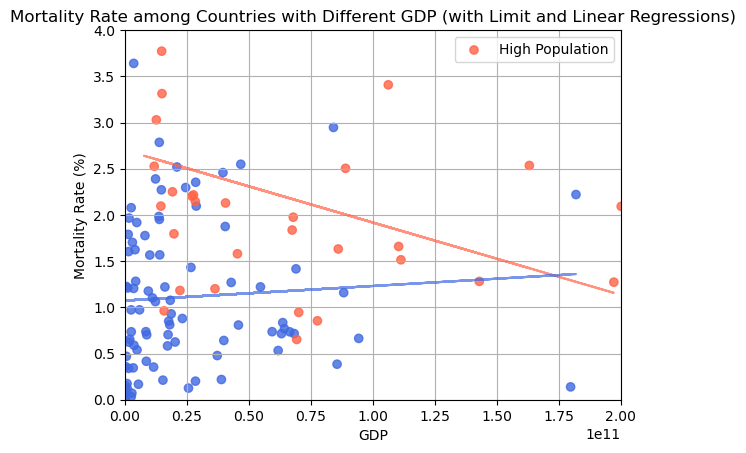

In [93]:
# define population status for the entire data set
for i in range(len(country_MR_GDP)):
    if int(country_MR_GDP.loc[i,'Population']) >= pop_standard:
        country_MR_GDP.loc[i, 'Population Status'] = 'High'
    else:
        country_MR_GDP.loc[i, 'Population Status'] = 'Low'

# plotting
fig, ax = plt.subplots()
colors = ['tomato' if i=='High' else 'royalblue' for i in country_MR_GDP['Population Status']]
plt.scatter(x=country_MR_GDP['GDP'], y=country_MR_GDP['Mortality Rate (%)'],color=colors,alpha=0.8)
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('GDP')
ax.legend(['High Population'])

# limits go here
xlim = 200000000000
ylim = 4
ax.set_xlim(0,xlim)
ax.set_ylim(0,ylim)

# linear regreesion for high population
df_high = country_MR_GDP[(country_MR_GDP['GDP']<=xlim) & (country_MR_GDP['Population Status']=='High')]
coef_high = np.polyfit(df_high['GDP'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['GDP'], poly1d_fn_high(df_high['GDP']), color = 'tomato', alpha=0.7)

# linear regression for low population
df_low = country_MR_GDP[(country_MR_GDP['GDP']<=xlim) & (country_MR_GDP['Population Status']=='Low')]
coef_low = np.polyfit(df_low['GDP'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['GDP'], poly1d_fn_low(df_low['GDP']), color = 'royalblue', alpha=0.7)

# set title
plt.title('Mortality Rate among Countries with Different GDP (with Limit and Linear Regressions)')
plt.show()

Let us first recall the definition of mortality rate from project one:

> $\color{red}{\text{ COVID-19 Mortality Rate of a Country}}$: the estimated probability *(sampled from the population)* that a COVID-19-infected individual will result in disease-related mortality in a country.

Or, in plain language:

> $\color{red}{\text{ COVID-19 Mortality Rate of a Country (Plain)}}$: "if I am sick in this country, by what probability, will I die from it?"

The graph above excludes the extreme values and takes linear regression for both high-population and low-population countries **automatically**. Feel free to download the .jpynb version from GitHub here and play around with it (line 17).

> GitHub: https://github.com/robinasaki/Analyzing-the-COVID-19-Mortality-Rate-with-respect-to-Different-Variables.git

The graph allows concluding that in **most countriess with a high population**, the mortality rate tends to decrease as the GDP increases. Vice versa, **in countries with a low population**, an GDP increases raises the mortality rate. The trendline in high-population countries is more inelastic than low population countries.

Moreover, countries with a low population tend to have **a lower average mortality rate and GDP** than countries with high population. These observations make sense as less populated countries have less labour force, resulting in a lower domestic output. Combine with the trend; a lowered GDP brings a reduced mortality rate.

Don't forget our observation from the graph before the limit: **more populated countries also tend to have more outliner in GDP and mortality rate**.

##### Plot: The role of the governmental mode regarding the mortality rate variation among countries

In [94]:
# high population countries
H_CivilianDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                         (country_MR_govt['Subtype']=='Civilian Dictatorship')]['Mortality Rate (%)'].mean()
H_MilitaryDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                         (country_MR_govt['Subtype']=='Military Dictatorship')]['Mortality Rate (%)'].mean()
H_ParliamentaryDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                           (country_MR_govt['Subtype']=='Parliamentary Democracy')]['Mortality Rate (%)'].mean()
H_PresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                          (country_MR_govt['Subtype']=='Presidential Democracy')]['Mortality Rate (%)'].mean()
H_RoyalDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                      (country_MR_govt['Subtype']=='Royal Dictatorship')]['Mortality Rate (%)'].mean()
H_SemiPresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='High') & 
                                              (country_MR_govt['Subtype']=='Semi-Presidential Democracy')]['Mortality Rate (%)'].mean()

# low population countries
L_CivilianDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                         (country_MR_govt['Subtype']=='Civilian Dictatorship')]['Mortality Rate (%)'].mean()
L_MilitaryDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                         (country_MR_govt['Subtype']=='Military Dictatorship')]['Mortality Rate (%)'].mean()
L_ParliamentaryDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                           (country_MR_govt['Subtype']=='Parliamentary Democracy')]['Mortality Rate (%)'].mean()
L_PresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                          (country_MR_govt['Subtype']=='Presidential Democracy')]['Mortality Rate (%)'].mean()
L_RoyalDictatorship = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                      (country_MR_govt['Subtype']=='Royal Dictatorship')]['Mortality Rate (%)'].mean()
L_SemiPresidentialDemocracy = country_MR_govt[(country_MR_govt['Population Status']=='Low') & 
                                              (country_MR_govt['Subtype']=='Semi-Presidential Democracy')]['Mortality Rate (%)'].mean()

# create a new DataFrame to store the data
subtype_govt = pd.DataFrame({
    'Civilian Dictatorship': [H_CivilianDictatorship, L_CivilianDictatorship],
    'Military Dictatorship': [H_MilitaryDictatorship, L_MilitaryDictatorship],
    'Parliamentary Democracy': [H_ParliamentaryDemocracy, L_ParliamentaryDemocracy],
    'Presidential Democracy': [H_PresidentialDemocracy, L_PresidentialDemocracy],
    'Royal Dictatorship': [H_RoyalDictatorship, L_RoyalDictatorship],
    'Semi-Presidential Democracy': [H_SemiPresidentialDemocracy, L_SemiPresidentialDemocracy]
}, index = ['High Population', 'Low Population']
)

# calculate the mean for both population status
high_mean = subtype_govt.loc['High Population',:].mean()
low_mean = subtype_govt.loc['Low Population',:].mean()

This should give us a DataFrame that provides the mortality rate mean of each government subtype. Now let us plot the graph for **low and high populations** to compare the difference.

To plot, we will further categorize governmental modes into six categories: **Civilian Dictatorship, Military Dictatorship, Parliamentary Democracy, Presidential Democracy, Royal Dictatorship, Semi-Presidential Democracy.**

A government with a **civilian dictatorship** are ruled by dictators who do not derive their powers from the military. For example, Afghanistan, Angola, etc.

A government with a **military dictatorship** are ruled by dictators who holds the military powers. For example, Botswana, Burkina Faso, etc.

A **parliamentary democracy** system is a system of democratic governance of a state where the executive derives its democratic legitimacy from its ability to command the support of the legislature, typically a parliament, to which it is accountable. For example, Germany, India, etc

A **presidential democracy** system is defined by the separation of the executive branch from other aspects of government. The head of government is elected to work alongside, but not as a part of, the legislature. There are several types of powers that are traditionally delegated to the president. For example, the Indonesia, Argentina, etc.

A **royal dictatorship** is a system ruled by "royal" members. For example, Bahrain, Cambodia, etc.

A **semi-presidential democracy** is a system in which a president exists alongside a prime minister and a cabinet, with the latter two being responsible to the legislature of the state. For example, Ireland, Kyrgyzstan, etc.

For countries with high population, I would expect **royal dictatorial** countries to have the lowest mortality rate as they usually have the strictest epidemic enforcement; on the other hand, I would expect **presidential democratic** to have the highest mortliayt rate as the presidents can make irresponsible rules to win the votes.

For countries with low population, I expect **royal dictatorial** countries to have the lowest mortality rate for the same reason. I would expect **civilian dictatorial** government to have the highest mortality rate as this governmental mode usually do not care about their citizens in small countries.

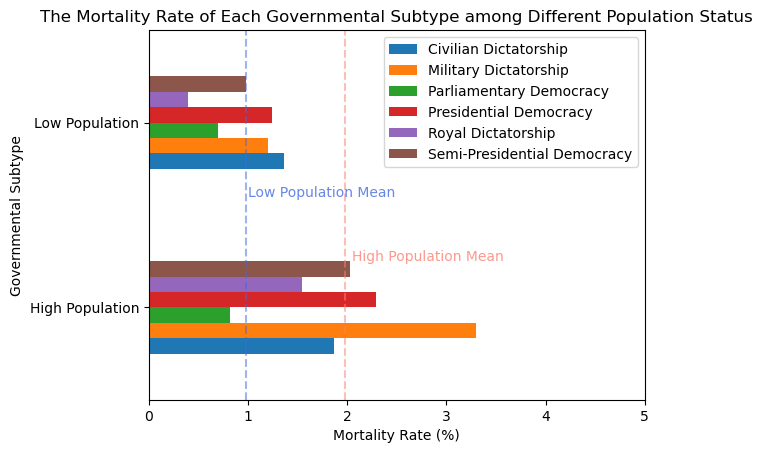

In [95]:
# plotting
fig, ax = plt.subplots()
subtype_govt.plot.barh(ax=ax)
ax.set_xlim(0,5)
plt.title('The Mortality Rate of Each Governmental Subtype among Different Population Status')
ax.set_xlabel('Mortality Rate (%)')
ax.set_ylabel('Governmental Subtype')

# plot the mean for each population
plt.axline(xy1=[high_mean,0],xy2=[high_mean,2],color='salmon', alpha=0.5, ls='--')
plt.axline(xy1=[low_mean,0], xy2=[low_mean,2], color='royalblue', alpha=0.5, ls='--')
ax.text(2.05,0.25,'High Population Mean', color='salmon', alpha=0.8)
ax.text(1,0.6,'Low Population Mean', color='royalblue', alpha=0.8)
plt.show()

The graph above gives the mortality rate means among different governmental subtypes of varying population. From the graph, we can tell that **in countries with a lower population**, the **royal dictatorship** governmental mode results in the lowest mortality rate and **civilian dictatorship** governments bring the highest mortality rate. **In countries with a higher population**, the **parliamentary democratic** governments minimize the mortality rate, and the highest mortality rates are result of **military dictatorship** governments. Moreover, we see that countries with a higher population have a higher overall mortality rate mean than countries with a lower population.

##### Plot: The role of literacy rate regarding the mortality rate variation among countries

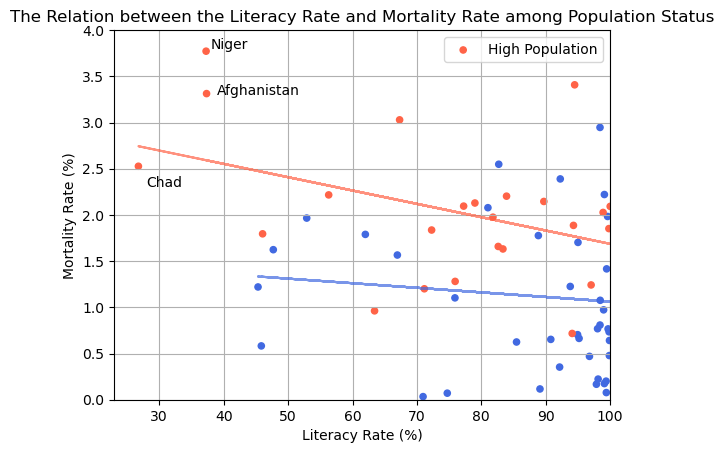

In [96]:
# plotting
fig, ax = plt.subplots()
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('Literacy Rate (%)')

# coloring and plotting
colors = ['tomato' if i=='High' else 'royalblue' for i in country_LR_MR['Population Status']]
country_LR_MR.plot.scatter(ax=ax, x='Literacy Rate (%)', y='Mortality Rate (%)', color=colors)

# limits go here
ax.set_xlim(23,100)
ax.set_ylim(0,4)

# linear regreesion for high population
df_high = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='High')]
coef_high = np.polyfit(df_high['Literacy Rate (%)'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['Literacy Rate (%)'], poly1d_fn_high(df_high['Literacy Rate (%)']), color = 'tomato', alpha=0.7)

# linear regression for low population
df_low = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='Low')]
coef_low = np.polyfit(df_low['Literacy Rate (%)'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['Literacy Rate (%)'], poly1d_fn_low(df_low['Literacy Rate (%)']), color = 'royalblue', alpha=0.7)

# styling
plt.grid(True)
ax.legend(['High Population'])
ax.text(28, 2.3, 'Chad')
ax.text(38, 3.8, 'Niger')
ax.text(39, 3.3, 'Afghanistan')
plt.title('The Relation between the Literacy Rate and Mortality Rate among Population Status')
plt.show()

> The lower bound of the X-axis is set to be 23 as no country with a literacy rate below 23.

With the current X and Y interval, we see a similar trend between the literacy and mortality rates among two population statuses. However, we do see **countries with a high population** having more outliner in the literacy rate. For example, we can see Chad's literacy rate of 26.76% and a mortality rate of 2.5267% at the very left side of the plot. However, let us modify the x_lim and the y_lim to move further into the distribution hotspot to analyze the trend further.

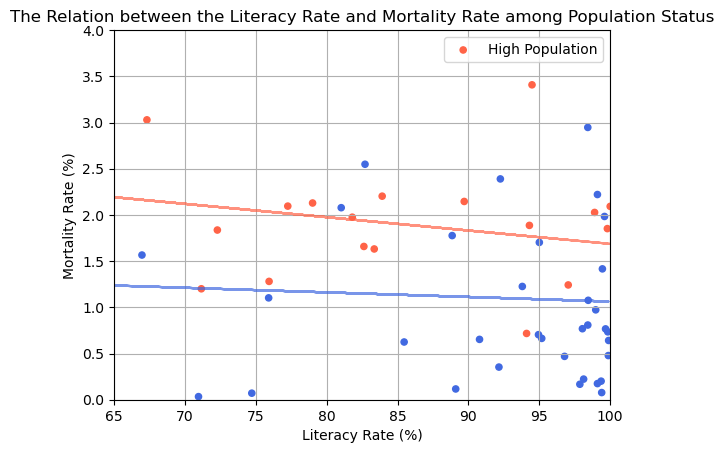

In [97]:
# plotting
fig, ax = plt.subplots()
ax.grid(True)
ax.set_ylabel('Mortality Rate (%)')
ax.set_xlabel('Literacy Rate (%)')

# coloring and plotting
colors = ['tomato' if i=='High' else 'royalblue' for i in country_LR_MR['Population Status']]
country_LR_MR.plot.scatter(ax=ax, x='Literacy Rate (%)', y='Mortality Rate (%)', color=colors)

# limits go here
ax.set_xlim(65,100)
ax.set_ylim(0,4)

# linear regreesion for high population
df_high = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='High')]
coef_high = np.polyfit(df_high['Literacy Rate (%)'],df_high['Mortality Rate (%)'],1)
poly1d_fn_high = np.poly1d(coef_high) 
plt.plot(df_high['Literacy Rate (%)'], poly1d_fn_high(df_high['Literacy Rate (%)']), color = 'tomato', alpha=0.7)

# linear regression for low population
df_low = country_LR_MR[(country_LR_MR['Literacy Rate (%)']<=xlim) & (country_LR_MR['Population Status']=='Low')]
coef_low = np.polyfit(df_low['Literacy Rate (%)'],df_low['Mortality Rate (%)'],1)
poly1d_fn_low = np.poly1d(coef_low) 
plt.plot(df_low['Literacy Rate (%)'], poly1d_fn_low(df_low['Literacy Rate (%)']), color = 'royalblue', alpha=0.7)

# styling
plt.grid(True)
ax.legend(['High Population'])
plt.title('The Relation between the Literacy Rate and Mortality Rate among Population Status')
plt.show()

The graph above includes linear regression automation for both population statuses. Feel free to download the .jpynb version from GitHub here and play around with it (line 17).

> GitHub: https://github.com/robinasaki/Analyzing-the-COVID-19-Mortality-Rate-with-respect-to-Different-Variables.git

After moving into the distribution hotspot, the trendlines of both **high and low population** remain relatively similar. Thus, we conclude that countries with high population shares a same decreasing trend with countries with a low population, which is an increase in the literacy rate decreases the mortality rate. However, the difference is not relatively significant.

This is reasonable as a higher literacy rate implies better public education, which leads to a better overall public health, thus decreasing the mortality rate.

<br>

### Maps and Interpretations: Project Two

In this section, we are going to focus on the message 

*$\color{gray}{\text{ "The role of GDP regarding the variation in the COVID-19 mortality rate among countries." }}$*

We select this as the previous plots show interesting linear regressions between the variables among subgroups. 

Before the detailed mapping, let us get a convenient data set. Let us begin with reading the csv.

In [98]:
# read the population csv
pop = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')

Then, let us merge it with the other data sets.

##### Merging with New Data Sets

To get our target data set for mapping, we will merge the following data sets into one:

confirmation count data, mortality count data, GDP data, population, more precise location data

> Note: The **Y-variable** (Mortality Rate) is calculated based on the first two data sets.

We have merged the data sets in the previous section. However, since both the confirmation count data and the mortality count data update daily, we merge again here.

In [99]:
# confirmation count data
confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirm = confirm.loc[:, ['Country/Region', 'Lat', 'Long', '3/1/23']].groupby('Country/Region').sum()
confirm = confirm.rename(columns={'3/1/23': 'Cumulative Confirm'}).dropna()

# mortality count data
death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
death = death.loc[:, ['Country/Region', '3/1/23']].groupby('Country/Region').sum()
death = death.rename(columns={'3/1/23': 'Cumulative Death'}).dropna()

# GDP data
gdp_country = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4898871.csv')
gdp_country = gdp_country.loc[:, ['Country Name', '2021']].rename(columns={'Country Name':'Country', '2021':'GDP'}).dropna()

# location data 
location = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')
location = location.loc[:, ['Country', 'Latitude', 'Longitude']]

# re-read the file to make sure there is no bug everytime we run this chunk
pop = pd.read_csv('c9481aeb-0a63-4e50-95a1-1618136764de_Data.csv')
pop = pop.loc[:, ['Country Name', '2021 [YR2021]']]
pop = pop.rename(columns={'Country Name': 'Country', '2021 [YR2021]': 'Population'}).dropna()

# let us begin to merge
df = pd.merge(confirm, death, on='Country/Region', how='inner')
df = pd.merge(df, gdp_country, left_on='Country/Region', right_on='Country', how='inner')
df = pd.merge(df, pop, left_on='Country', right_on='Country', how='inner')
df = pd.merge(df, location, left_on='Country', right_on='Country', how='inner')

# calculate the Y-variable
df['Mortality Rate (%)'] = (df['Cumulative Death'] / df['Cumulative Confirm']) * 100

# calculate the population status (defined before)
for i in range(len(df)):
    if int(df.loc[i,'Population']) >= pop_standard:
        df.loc[i, 'Population Status'] = 'High'
    else:
        df.loc[i, 'Population Status'] = 'Low'

mapping = df[['Country', 'Longitude', 'Latitude', 'Population Status', 'Mortality Rate (%)', 'GDP', 'Population', 'Cumulative Confirm', 'Cumulative Death']]
mapping = mapping.rename(columns={'Latitude':'Lat', 'Longitude':'Long'})

The *mapping* data set above should be the target mapping data set which includes the following:

Country name, Latitude and longitude, Population status (defined before)(**Y-variable subgroup standard**), Mortality rate (in percentage %)(**Y-variable**), GDP, Population, Cumulative confirm count and death count

However, due to some reason, the global confirmation count and global death count data sets do not have the US included. Let us add the US data mannually.

In [100]:
df = pd.DataFrame([['United States of America', 38, -97, 'High', 1.09087, 23320000000000, 331900000, 103000000, 1130000]], columns=['Country', 'Lat', 'Long', 'Population Status', 'Mortality Rate (%)', 'GDP', 'Population', 'Cumulative Confirm', 'Cumulative Death'])
if len(mapping) == 155:
    mapping = mapping.append(df).reset_index(drop=True)
    
# Long and Lat will be zipped and converted in the upcoming section

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_1796/1770075123.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mapping = mapping.append(df).reset_index(drop=True)


Now we have all the data for the USA. Let us move further.

<br>

##### Map: Countries with Top Mortality Rate

Let us first plot a distribution map for countries with the top mortality rate to see if there is any geographical factors resulting in the outliners.

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_1796/3885855547.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  gdf2 = gdf.dropna(0).sort_values('Mortality Rate (%)', ascending=False).head(num)


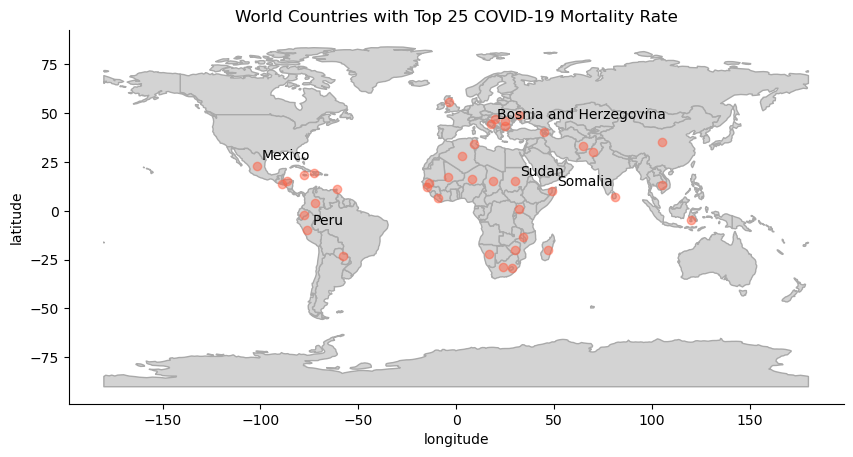

In [101]:
# copy the mapping data 
df = mapping.copy()

# read the world data and setting up the GeoDataFrame
quantile = mapping['Mortality Rate (%)'].quantile(.75)
df = df[df['Mortality Rate (%)'] >= quantile]
df.at[190,'Lat'] = 55.3781
df.at[190,'Long'] = -3.4360
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df['Coordinates'] = list(zip(df.Long, df.Lat))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

# plotting 
fig, gax = plt.subplots(figsize = (10,8))
world.plot(ax=gax, edgecolor='darkgray',color='lightgray')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gdf.plot(ax=gax, color='tomato', alpha=0.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('World Countries with Top 25 COVID-19 Mortality Rate')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# naming the top 5 GPD
num = 5
gdf2 = gdf.dropna(0).sort_values('Mortality Rate (%)', ascending=False).head(num)
for x, y, label in zip(gdf2['Coordinates'].x, gdf2['Coordinates'].y, gdf2['Country']):
   gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points', color = 'black')
plt.show()

Countries with the top 25 COVID-19 mortality rate are mostly distributed in **South America, Africa and East Europe**. There are also significant number of top GDP countries in **Southeast Asia**. However, countries with the top 5 mortality rate are evenly distributed in the Americas, Africa and East Europe. This also implies that there exist no significant geographical factor affecting the COVID-19 mortality rates.

##### Map: Mortality Rate Distribution Color Map with High GDP Countries

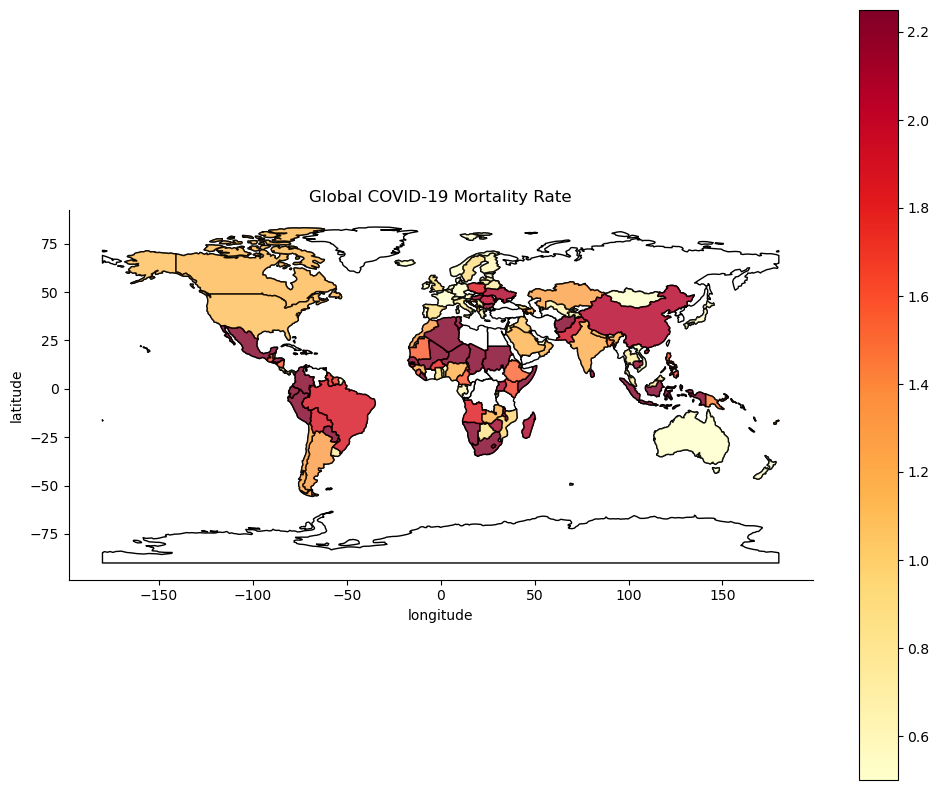

In [102]:
# setting up the GeoDataFrame
df = mapping.copy()
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
geodf = world.merge(df, left_on = 'name', right_on = 'Country', how = 'inner')

# plotting
fig, gax = plt.subplots(figsize = (12,10))
world.plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
geodf.plot(
    ax=gax, edgecolor='black', column='Mortality Rate (%)', legend=True, cmap='YlOrRd', alpha=0.8,
    vmin=0.5, vmax=2.25
)
gax.set_title('Global COVID-19 Mortality Rate')
plt.show()

The color map above shows the **mortality rate distribution** between countries. We can tell that **in North America**, three major countries (Canada, USA, Mexico) have different COVID-19 mortality rate severity. The mortality rate is relatively lower in the upper part of North America and is mainly resuluting from the governmental mode and population density.

Compared to North America, **South America** tend to have a higher overall mortality rate with outliners such as Brazil. Its high mortality rate is mainly a result of pandemic policy failure. 

Overall, **European** countries tend to have a low mortality rate. However, East Europe has a significantly higher mortality rate than the rest.

Things start to turn sour in **Africa**; this continent contains many mortality rate hotspots. The mortality rate variation is higher than in any other continent. Although more developed countries in Africa such as South Africa tend to have a lower mortality rate compare to the hotspots, they still have a high mortality rate compared to the rest of the world.

**Asia** is another continent with a high variance. We can see Thailand and Vietnam with lower mortality rates, and countries such as China and Indonesia with higher mortality rates. This is a result of the difference in governmental modes among Asian countries.

**Oceania** tends to have a low mortality rate due to the geographic advantage.

##### Map: Mortality Rates in the US

##### Merging with New Data Sets

For this part, we are going to focus on the mainland USA, so we are ignoring the islands and Alaska for a better visual experience.

Since the US data are recorded in another data page, we should merge the following data into our target mapping data, US cumulative death count, US cumulative confirmation count, US GDP by state, State polygon for plotting.

> Again, the Y-value, **Mortality Rate**, is calculated using two data sets.

In [104]:
# loading data
US_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
US_confirm = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
US_GDP = pd.read_csv('SAGDP2N__ALL_AREAS_1997_2020.csv').dropna(0)
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

# cleaning up US_death
US_death = US_death.loc[:, ['Province_State', '3/1/23']]
US_death = US_death.groupby('Province_State').sum()
US_death = US_death.rename(columns={'3/1/23':'Cumulative Death'})

# cleaning up US_confirm
US_confirm = US_confirm.loc[:, ['Province_State', '3/1/23']]
US_confirm = US_confirm.groupby('Province_State').sum()
US_confirm = US_confirm.rename(columns={'3/1/23':'Cumulative Confirm'})

# query
df = pd.merge(US_death, US_confirm, on='Province_State', how='inner')
df['Mortality Rate (%)'] = (df['Cumulative Death'] / df['Cumulative Confirm']) * 100
state_df = state_df.query("NAME != 'Guam' & NAME != 'Alaska' & NAME != 'Northern Mariana Islands' & NAME != 'American Samoa' & NAME != 'Puerto Rico' & NAME != 'United States Virgin Islands' & NAME != 'Hawaii' & NAME != 'Commonwealth of the Northern Mariana Islands'")
USMR = pd.merge(state_df, df, left_on='NAME', right_on='Province_State', how='inner') 
USMR = USMR.drop(index=[1, 12, 13, 41])

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_1796/546145120.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  US_GDP = pd.read_csv('SAGDP2N__ALL_AREAS_1997_2020.csv').dropna(0)


The *USMR*, which stands for the United States Mortality Rate, should give us enough geographic information for the plot and coloring. It should contain the polygon information and other critical information such as the mortality rate among the states, names, etc.

Let us use it to plot.

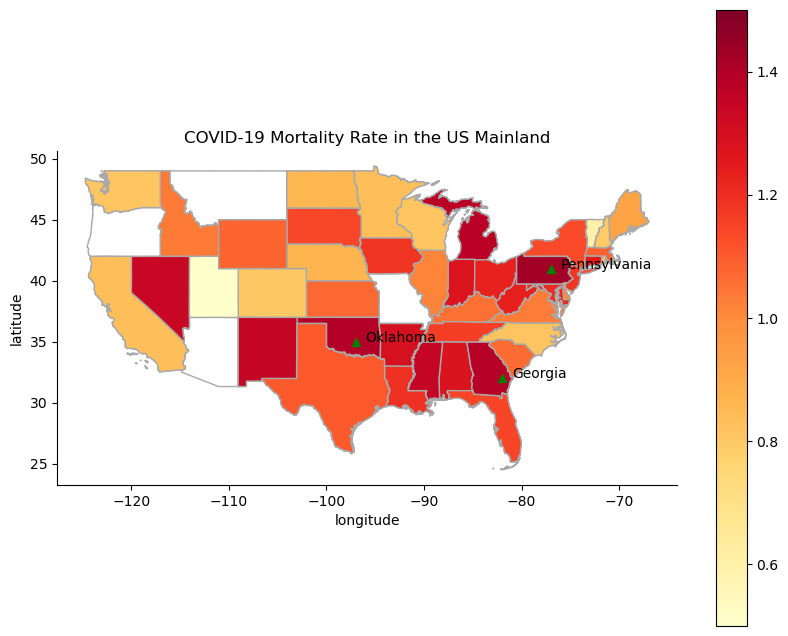

In [105]:
# plot the US mainland
fig, gax = plt.subplots(figsize=(10, 8))
state_df.plot(ax=gax, edgecolor='darkgray',color='white')

# coloring
USMR.plot(
    ax=gax, edgecolor='darkgray', column='Mortality Rate (%)', legend=True, cmap='YlOrRd',
    vmin=0.5, vmax=1.5
)

# detailing
plt.title('COVID-19 Mortality Rate in the US Mainland')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# add top three mortality rate
gax.plot(-77, 41, 'g^')
gax.plot(-97, 35, 'g^')
gax.plot(-82, 32, 'g^')
gax.text(-76, 41, 'Pennsylvania', color='black', size=10)
gax.text(-96, 35, 'Oklahoma', color='black', size=10)
gax.text(-81, 32, 'Georgia', color='black', size=10)

plt.show()

The graph above shows us the COVID-19 mortality mean among the US mainland states. The states with top three mortality rate are noted with green triangles. The graph shows that the overall COVID-19 mortality rate varies from west coast to east coast, where the situation in the eastern mainland is more severe. Coastal states tend to have a lower mortality rate to compare to continental states.

States with the top three mortality rates are distribution in **the central US** and **the east coast**, with two blues states and one red state.

<br>

-------
## Project Three

### Potential Data to Scrape

The previous project two analyzed factors and answered the research question *what factors will affect the COVID-19 mortality rate* from an economic perspective. However, there exist much more perspectives to be analyzed from. Thus for project three, we will focus more on the *environmental factors* especially changes in temperature, compare the **daily temperature change** to the **global confirmation count change** (as we do not have detailed mortality daily count). 

However, due to the lack of a complete dataset, we are going to commit web scraping. The website link is provided as below.

> *https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature*

The website table contains **countries and their monthly changes in temperature average**, which are enough for our research purpose. 

We will **outer merge** the previous dataset with the scrapped dataset and analyze the relation between changes in temperature mean and changes in COVID-19 confirmation count. With this new information, we can provide more perspectives to the research question (*"what factors will impact the COVID-19 mortality rate among countries?"*).

<br>

-------

**HOWEVER**,

before the introduction of *dataset length restriction*, an analysis was already finished on comparing the relations between the Monkeypox Virus (referred later to as MPOX). Thus I am going to show the web scraping for the MPOX first (as it is so much more complicated than the provided one and took me a while to complete), and then show the acutal **temperate change**.

The monkeypox virus (later referred to as *"MPOX"*) is a viral zoonosis (a virus transmitted to humans from animals) with symptoms similar to those seen in the past in smallpox patients, although it is clinically less severe $^{9}$. More info on the virus could be found in the WHO website here.

> *https://www.who.int/news-room/fact-sheets/detail/monkeypox*

To further understand the research question, we are going to compare the **MPOX confirmation count** (Why not mortality rate? Because there is too many NA data in the death count) with the **COVID-19 confirmation count**.

Due to the lack of a complete csv, we are going to scrap the dataset from the website. 

The website is provided here:

> *https://en.wikipedia.org/wiki/2022–2023_mpox_outbreak*

The website contains a table with **country name, MPOX confirmation case, MPOX total count, etc.**, which are enough for our research purpose.

We will **outer merge** the previous dataset with the result (MPOX dataset) and analyze their similarities and differences in trend. With this new information, we can provide more answers to the research question (*"what factors will impact the COVID-19 mortality rate among countries?"*) from another unique perspective.

<br>

### Potential Challenges

**Temperatue Change**: After finishing the web scraping on the MPOX, I do not think I face much challenges in the provided dataset. However, one challenge we have is having more than one table in the provided website.

**MPOX**: The data is a historical cumulative (of 2022) thus we do not have to run the program over time. I am able to scrap the data, however, there exists potential challenges such as cleaning the data and type conversion (some data are presented with a superscript on table thus we have to delete the latter). Thus on top of the normal scrapping code structure, we have to further define more functions to clean the data and convert the types.

### Scraping Data from a Website

*"This one is for MPOX dataset, showing for bonus mark.*
*-and yes this is an original website"*

In [106]:
# importing libraries
from bs4 import BeautifulSoup
import requests

# define url variable
url = 'https://en.wikipedia.org/wiki/2022–2023_mpox_outbreak'

# get response from url
response = requests.get(url)

# convert into soup object
soup = BeautifulSoup(response.content)

# find the table we want from the soup
data_table = soup.find_all('table', 'wikitable sortable plainrfowheaders')[0]

# convert them into a list by finding the <tr>
all_values = data_table.find_all('tr')

# remove credit (in the bottom of the table) info which causes errors
all_values = all_values[:-1]

# create a new DataFrame to record the data
mpdf = pd.DataFrame(columns=['Country', 'MPOX Confirmed', 'MPOX Suspected', 'MPOX Total', 'MPOX Deaths', 'Last Case Update'])

### create loop to record the data

# set initial position
ix = 0

# begin for loop from position 1 (skip 0)
for r in all_values[1:]:
    # convert to list
    # note that the table contains 
    values = r.find_all('th')
    values += r.find_all('td')

    # record data as temps
    country = values[0].text.strip('\n')
    confirm = values[1].text.strip('\n')
    suspect = values[2].text.strip('\n')
    total = values[3].text.strip('\n')
    deaths = values[4].text.strip('\n')
    last_u = values[5].text.strip('\n')

    # record the temp data into the DataFrame
    mpdf.loc[ix] = [country, confirm, suspect, total, deaths, last_u]
    ix += 1

# define a stripping function
def convert(data: str) -> int:
    if data == '':
        return '—'
    else:
        listed = list(data.split('['))
        return listed[0]

def country_convert(data: str) -> str:
    listed = list(data.split('['))
    return listed[0]

# strip all the data
for i in range(len(mpdf['MPOX Deaths'])):
    mpdf['MPOX Deaths'][i] = convert(mpdf['MPOX Deaths'][i])

for i in range(len(mpdf['Country'])):
    mpdf['Country'][i] = country_convert(mpdf['Country'][i]).strip('\xa0').strip(' ')

# return the DataFrame
mapping.iloc[155, 0] = 'United States'
mpdf.head(10).style.set_caption('Scrap: Countries and their MPOX Epidemic Data')

,Country,MPOX Confirmed,MPOX Suspected,MPOX Total,MPOX Deaths,Last Case Update
0,Andorra,4,0,5 August 2022[252],2 July 2022,
1,Argentina,"1,127",2[254],13 April 2023[254],27 May 2022,29 November 2022[254]
2,Aruba,3,0,26 October 2022[256],22 August 2022,
3,Australia,144,0,8 December 2022[258],20 May 2022,
4,Austria,327,0,13 December 2022[252],22 May 2022,
5,Bahamas,2,0,22 August 2022[259],30 June 2022,
6,Bahrain,1,0,16 September 2022[261],16 September 2022,
7,Barbados,1,0,16 July 2022[262],16 July 2022,
8,Belgium,793,2[263],15 March 2023[252],19 May 2022,August 2022[263]
9,Benin,3,0,14 June 2022[264],14 June 2022,


The dataset above provides **country name, MPX confirmation count, MPOX suspected count, MPOX cumulative count, MPOX death count, last update, .etc** which is enough for us to move forward. Now let us merge it with the previous datasets. 

<br>

**However**, since the dataset contains less than 1000 observations, we are going to abandon it and go back to our initial topic "global temperature mean change and the corresponding COVID-19 confirmation count." Let us commit the web scraping for this topic. Let us begin with requesting the content and convert it into a Beautiful Soup object.

In [107]:
# define url variable
url = 'https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature'

# get response from url
response = requests.get(url)

# convert into soup object
soup = BeautifulSoup(response.content)

Now we have a *BeautifulSoup object* that the HTML information from the web. Now let us create loops to record the data into a DataFrame.

In [108]:
# create an empty DataFrame to store the data, we will change their name later as they will be randomized by Python to decrease the run time.
temp = pd.DataFrame(columns={'1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'})

# since we have five tables in the web, we have to loop and store the data
for i in range(0,6):

    # select the table for current iteration
    sub_table = soup.find_all('table', 'wikitable plainrowheaders sortable')[i]

    # convert Beautiful Soup object into list
    all_values = sub_table.find_all('tr')

    # set initial position for current iteration
    ix = len(temp)

    # the recording loop for each iteration starts here
    for row in all_values[1:]:

        # convert row into a list
        values = row.find_all('td')

        # indexing the list and access the text, then strip the new line sequence ('\n')
        country = values[0].text.strip('\n')
        city = values[1].text.strip('\n')
        jan = values[2].text.strip('\n')
        feb = values[3].text.strip('\n')
        mar = values[4].text.strip('\n')
        apr = values[5].text.strip('\n')
        may = values[6].text.strip('\n')
        june = values[7].text.strip('\n')
        july = values[8].text.strip('\n')
        aug = values[9].text.strip('\n')
        sept = values[10].text.strip('\n')
        oct = values[11].text.strip('\n')
        nov = values[12].text.strip('\n')
        dec = values[13].text.strip('\n')
        yr = values[14].text.strip('\n')

        # input the data
        temp.loc[ix] = [country, city, jan, feb, mar, apr, may, june, july, aug, sept, oct, nov, dec, yr]
        ix += 1


# Python (and Pandas) will randomize the column order when committing the nested loop 
# (the order will be different everytime). Thus let create a loop to determine the rename the DataFrame.
temp = temp.rename(columns={temp.columns[0]:'Country', temp.columns[1]:'City', temp.columns[2]:'Jan', temp.columns[3]:'Feb', temp.columns[4]:'Mar',
                            temp.columns[5]:'Apr', temp.columns[6]:'May', temp.columns[7]:'June', temp.columns[8]:'July', temp.columns[9]:'Aug',
                            temp.columns[10]:'Sept', temp.columns[11]:'Oct',temp.columns[12]:'Nov', temp.columns[13]: 'Dec', temp.columns[14]:'Year'})

The table above provides us with the original table from the web. However, we are going to commit some queries to remove the fahrenheit temperature data.

In [109]:
# define a function to further strip the data
def no_fahrenheit(temp:str) -> float:
    """Take only the celsius part of the temperature."""
    lst = list(temp.replace('−', '-').split('('))
    return float(lst[0])

# apply the function
for i in range(len(temp['Jan'])):
    for j in range(len(temp.T) - 2):
        temp.iloc[i, j+2] = no_fahrenheit(temp.iloc[i, j+2])

# glimpse at the final table
temp.head(10).style.set_caption('Table: Countries and their Temperature Changes')

,Country,City,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Year
0,Algeria,Algiers,11.200000,11.900000,12.800000,14.700000,17.700000,21.300000,24.600000,25.200000,23.200000,19.400000,15.200000,12.100000,17.400000
1,Algeria,Tamanrasset,12.800000,15.000000,18.100000,22.200000,26.100000,28.900000,28.700000,28.200000,26.500000,22.400000,17.300000,13.900000,21.700000
2,Algeria,Reggane,16.000000,18.200000,23.100000,27.900000,32.200000,36.400000,39.800000,38.400000,35.500000,29.200000,22.000000,17.800000,28.300000
3,Angola,Luanda,26.700000,28.500000,28.600000,28.200000,27.000000,23.900000,22.100000,22.100000,23.500000,25.200000,26.700000,26.900000,25.800000
4,Benin,Cotonou,27.300000,28.500000,28.900000,28.600000,27.800000,26.500000,25.800000,25.600000,26.000000,26.700000,27.600000,27.300000,27.200000
5,Benin,Parakou,26.500000,28.700000,29.600000,29.000000,27.500000,26.100000,25.100000,24.700000,25.000000,26.100000,26.600000,26.100000,26.800000
6,Benin,Kandi,24.900000,27.800000,30.900000,32.100000,30.400000,28.100000,26.400000,26.000000,26.200000,27.800000,26.500000,24.800000,27.700000
7,Botswana,Maun,25.400000,25.100000,24.200000,22.600000,18.700000,15.700000,15.800000,18.800000,23.100000,26.600000,26.400000,25.800000,22.400000
8,Botswana,Gaborone,26.000000,25.000000,24.000000,21.000000,17.000000,13.000000,13.000000,17.000000,21.000000,23.000000,25.000000,25.000000,21.000000
9,Botswana,Ghanzi,25.900000,25.300000,24.100000,21.200000,17.600000,14.300000,14.100000,17.100000,21.500000,24.600000,25.700000,26.100000,21.400000


The table contains **countries, city, their temperature change and year average**.

Now let us move further to merge the data with the COVID-19 confirmation data.

<br>

### Merging the Scraped Dataset

Let us load the COVID-19 dataset first.

In [110]:
coviddf = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
    on_bad_lines='skip')

The dataset contains **countries, city and their confirmation data on daily basis**. Now let us query the date into monthly intervals during 2022.

In [111]:
coviddf = coviddf = coviddf.T
coviddf = coviddf.reset_index(drop=False)

from datetime import datetime

# convert all str index into datetime object
for i in range(len(coviddf.loc[4:, 'index'])):
    str_obj = coviddf.loc[(4+i), 'index']
    coviddf.loc[(4+i), 'index'] = datetime.strptime(str_obj, '%m/%d/%y').month

# store the aggregate occurance of each month
count_list = []
for i in range(1,12):
    count_list.append(list(coviddf['index']).count(i))

# sum up the aggregate confirmation count in each month
coviddf2 = coviddf[4:].groupby('index').sum()
coviddf2 = coviddf2.T.rename(columns={1:'Jan COVID', 2:'Feb COVID', 3:'Mar COVID', 4:'Apr COVID', 5:'May COVID', 
                                      6:'June COVID', 7:'July COVID', 8:'Aug COVID', 9:'Sept COVID', 10:'Oct COVID', 11:'Nov COVID', 12:'Dec COVID'})
coviddf = coviddf[:4].T.drop('index').rename(columns={0:'City COVID', 1:'Country', 2:'Lat', 3:'Long'})
coviddf = pd.concat([coviddf, coviddf2], axis=1)

# devide the aggregate count by the aggregate occurance
for i in range(len(count_list)):
    for j in range(len(coviddf)):
        coviddf.iloc[j, i+4] = float(coviddf.iloc[j, i+4]) / count_list[i]

# provide the year average just like the temperature data did
for i in range(len(coviddf)):
    coviddf.loc[i, 'Year COVID'] = float((coviddf.iloc[i, 4:].sum())/ len(coviddf.iloc[i, 4:]))

The steps above repeat the same algorithm of how the web average temperature is calculated and provide **country names, city names, longitude and latitude, their mean confirmation count of each month and annual average**. Then let us move on to merge the datasets.

In [112]:
# we cannot left_on=['City', 'Countries'] here because the given dataset contains almost no city info. If outer join, there is only 4 observations.
df = pd.merge(temp, coviddf, left_on=['Country'], right_on=['Country'], how='outer')
df = df.drop(columns=['City COVID']).dropna()
df.head(10).style.set_caption('Countries, their Monthly Temperature Change and Confirmation Count Change')

,Country,City,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Year,Lat,Long,Jan COVID,Feb COVID,Mar COVID,Apr COVID,May COVID,June COVID,July COVID,Aug COVID,Sept COVID,Oct COVID,Nov COVID,Dec COVID,Year COVID
0,Algeria,Algiers,11.200000,11.900000,12.800000,14.700000,17.700000,21.300000,24.600000,25.200000,23.200000,19.400000,15.200000,12.100000,17.400000,28.033900,1.659600,182170.708738,159414.212389,139753.205882,129143.511111,132714.580645,137192.688889,147011.215054,164716.462366,173238.222222,176721.462366,182810.088889,17926602.000000,1511652.950658
1,Algeria,Tamanrasset,12.800000,15.000000,18.100000,22.200000,26.100000,28.900000,28.700000,28.200000,26.500000,22.400000,17.300000,13.900000,21.700000,28.033900,1.659600,182170.708738,159414.212389,139753.205882,129143.511111,132714.580645,137192.688889,147011.215054,164716.462366,173238.222222,176721.462366,182810.088889,17926602.000000,1511652.950658
2,Algeria,Reggane,16.000000,18.200000,23.100000,27.900000,32.200000,36.400000,39.800000,38.400000,35.500000,29.200000,22.000000,17.800000,28.300000,28.033900,1.659600,182170.708738,159414.212389,139753.205882,129143.511111,132714.580645,137192.688889,147011.215054,164716.462366,173238.222222,176721.462366,182810.088889,17926602.000000,1511652.950658
3,Angola,Luanda,26.700000,28.500000,28.600000,28.200000,27.000000,23.900000,22.100000,22.100000,23.500000,25.200000,26.700000,26.900000,25.800000,-11.202700,17.873900,65149.776699,55519.619469,45897.098039,41151.200000,43333.731183,45687.855556,47713.182796,49829.408602,52821.100000,57631.956989,60623.455556,5872760.000000,495239.875761
4,Benin,Cotonou,27.300000,28.500000,28.900000,28.600000,27.800000,26.500000,25.800000,25.600000,26.000000,26.700000,27.600000,27.300000,27.200000,9.307700,2.315800,17276.563107,14696.345133,12599.450980,11521.200000,11712.956989,11920.166667,12331.430108,13191.021505,16738.544444,18228.236559,18525.588889,1736509.000000,145788.500337
5,Benin,Parakou,26.500000,28.700000,29.600000,29.000000,27.500000,26.100000,25.100000,24.700000,25.000000,26.100000,26.600000,26.100000,26.800000,9.307700,2.315800,17276.563107,14696.345133,12599.450980,11521.200000,11712.956989,11920.166667,12331.430108,13191.021505,16738.544444,18228.236559,18525.588889,1736509.000000,145788.500337
6,Benin,Kandi,24.900000,27.800000,30.900000,32.100000,30.400000,28.100000,26.400000,26.000000,26.200000,27.800000,26.500000,24.800000,27.700000,9.307700,2.315800,17276.563107,14696.345133,12599.450980,11521.200000,11712.956989,11920.166667,12331.430108,13191.021505,16738.544444,18228.236559,18525.588889,1736509.000000,145788.500337
7,Botswana,Maun,25.400000,25.100000,24.200000,22.600000,18.700000,15.700000,15.800000,18.800000,23.100000,26.600000,26.400000,25.800000,22.400000,-22.328500,24.684900,175732.689320,152372.743363,120790.117647,116537.488889,119014.215054,125360.977778,137207.150538,154976.935484,165743.166667,171262.462366,176104.333333,16810821.000000,1417378.713880
8,Botswana,Gaborone,26.000000,25.000000,24.000000,21.000000,17.000000,13.000000,13.000000,17.000000,21.000000,23.000000,25.000000,25.000000,21.000000,-22.328500,24.684900,175732.689320,152372.743363,120790.117647,116537.488889,119014.215054,125360.977778,137207.150538,154976.935484,165743.166667,171262.462366,176104.333333,16810821.000000,1417378.713880
9,Botswana,Ghanzi,25.900000,25.300000,24.100000,21.200000,17.600000,14.300000,14.100000,17.100000,21.500000,24.600000,25.700000,26.100000,21.400000,-22.328500,24.684900,175732.689320,152372.743363,120790.117647,116537.488889,119014.215054,125360.977778,137207.150538,154976.935484,165743.166667,171262.462366,176104.333333,16810821.000000,1417378.713880


The table above contains **countries, city, monthly temperature changes, Latitude and Longitude and monthly COVID-19 confirmation count changes**. The statistics table is too large to be shown on the page, thus we cannot yet conclude anything. Before moving into the visualization, the number of observations is provided below.

In [113]:
print('The Observation Count of the Given Dataset is: ' + str(len(df)))

The Observation Count of the Given Dataset is: 1154


This number meets the standard. Let us move further and visualize the scraped dataset.

<br>

### Visualizing the Scraped Dataset

Let us begin by plotting a scatterplot between **annual temperature average** and **annual COVID-19 confirmation count** to see the relation between the two variables.

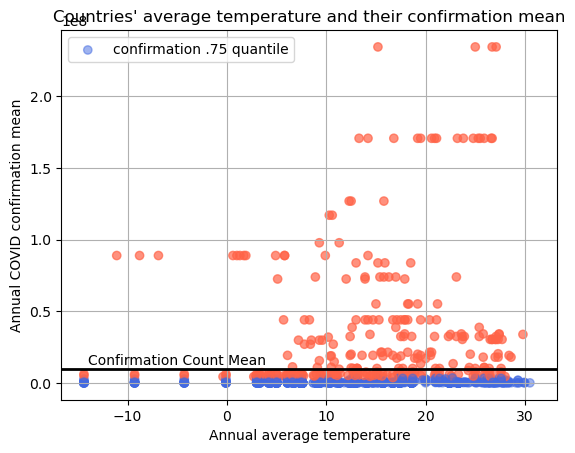

In [114]:
fig, ax = plt.subplots()

colors = ['royalblue' if i<=df['Year COVID'].quantile(0.75) else'tomato' for i in df['Year COVID']]
alphas = [0.5 if i<=df['Year COVID'].quantile(0.75) else 0.7 for i in df['Year COVID']]
plt.scatter(x=df['Year'], y=df['Year COVID'], color=colors, alpha=alphas)
ax.set_ylabel('Annual COVID confirmation mean')
ax.set_xlabel('Annual average temperature')
ax.grid(True)
plt.axline(xy1=[-13, df['Year COVID'].mean()], xy2=[31, df['Year COVID'].mean()], color='black', linewidth=2)
ax.text(-14, df['Year COVID'].mean()+3000000, 'Confirmation Count Mean', color='black')
ax.legend(['confirmation .75 quantile'], loc='upper left')
plt.title('Average Temperature vs Confirmation Mean')
plt.show()

> **This is before removing the outliners. They will be removed after.**

So far we can tell most regions have a low COVID-19 confirmation count mean. Countries with **lower temperature** tend to have more confirmation mean outliners than countries with **higher temperatures**. However, there also exist confirmation mean outliners around the temperature median (shown in the plot). 

Let us first generate the regression line before removing the outliners, and then remove the outliners to see a more precise one.

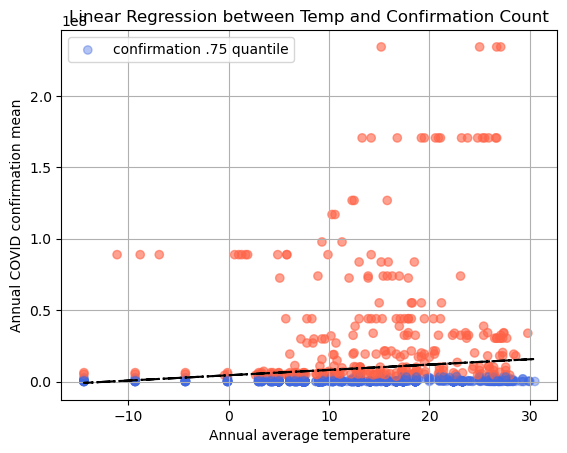

In [115]:
fit = df[df['Year COVID']>=0]
fig, ax = plt.subplots()

colors = ['royalblue' if i<=df['Year COVID'].quantile(0.75) else 'tomato' for i in df['Year COVID']]
alphas = [0.4 if i<=df['Year COVID'].quantile(0.75) else 0.6 for i in df['Year COVID']]
plt.scatter(x=df['Year'], y=df['Year COVID'], color=colors, alpha=alphas)
ax.set_ylabel('Annual COVID confirmation mean')
ax.set_xlabel('Annual average temperature')
ax.legend(['confirmation .75 quantile'], loc='upper left')

# regression line generation
templst = list(fit['Year'])
covidlst = list(fit['Year COVID'])
coef = np.polyfit(templst, covidlst, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(fit['Year'], poly1d_fn(fit['Year']), color='black', linewidth=1.5, linestyle='-.')

ax.grid(True)
plt.title('Regression between Temp and Confirmation Count')
plt.show()

Before dropping the outliners, the trendline shows the relationship that an increase in the average temperature will result in an increased COVID-19 confirmation average.

Now let us remove the outliners from the plot and generate another regression line within.

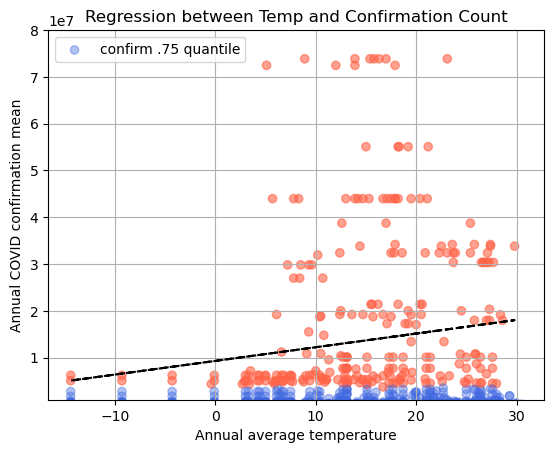

In [143]:
fit = df[df['Year COVID']>=1000000]
fit = fit[fit['Year COVID']<=80000000]
fig, ax = plt.subplots()

colors = ['royalblue' if i<=df['Year COVID'].quantile(0.75) else 'tomato' for i in df['Year COVID']]
alphas = [0.4 if i<=df['Year COVID'].quantile(0.75) else 0.6 for i in df['Year COVID']]
plt.scatter(x=df['Year'], y=df['Year COVID'], color=colors, alpha=alphas)
ax.set_ylabel('Annual COVID confirmation mean')
ax.set_xlabel('Annual average temperature')
ax.legend(['confirm .75 quantile'], loc='upper left')
ax.set_ylim(1000000,80000000)

# regression line generation
templst = list(fit['Year'])
covidlst = list(fit['Year COVID'])
coef = np.polyfit(templst, covidlst, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(fit['Year'], poly1d_fn(fit['Year']), color='black', linewidth=1.5, linestyle='--')

ax.grid(True)
plt.title('Regression between Temp and Confirmation Count')
plt.show()

This version of the graph removes the outliners by selecting only significant observations (whose COVID-19 confirmation count is rger than 1000000 and smaller than 80000000). Compare to the former, we see an more inelastic relation between the annual average temperature and the annual COVID-19 confirmation mean, which implies the latter is more sensitive to the changes in the former. This allows us to conclude the relation as *"the annual COVID-19 temperature tend to increase as the annual average temperature rises"*. With the equation concluded from above, 

$\#confirmation$ $\approx$ 292089.76692336 + 9298279.88957761 $temp$

In [117]:
print(coef)

[ 292089.76692336 9298279.88957761]


Where the coefficients are given from codes above. This implies for **each one Celsius degree increase in the temperature, the confirmation count tend to increase by 9298279.88957761 unit** accordingly using given datasets (after excluding the outliners). Furthermore, let us first merge it with the geographic location dataset and population dataset in the upcoming section to plot the distribution and find the relation between the `population` of a country and its COVID-19 confirmation count.

<br>

### Adding a New Dataset

In the previous section, we conclude the mathematical relation between the `COVID-19 confirmation count` and `annual average temperature` as following,

$\#confirmation$ $\approx$ 292089.76692336 + 9298279.88957761 $temp$

As we have plotted the COVID-19 related distribution in the previous project two, here let us add a new data set with the existing temperature dataset to analyze the global temperature distribution, and compare it with the plot from the previous project two. 

This dataset is chosen as it can answer two research questions (*the temperature distribution* and *the relation between the population and the COVID-19 confirmation count*) while being able to maintain the observation count after committing an inner merge. We will analyze the relation between two latter variables because in more populated countries, there is more opportunity for COVID-19 to spread. Moreover, we categorized the y-variables into two groups by their population in project two, but did not commit a detailed research on them. Thus, this research question on population would be meaningful.

In [118]:
# reading the dataset
geolocation = pd.read_csv('https://gist.githubusercontent.com/curran/13d30e855d48cdd6f22acdf0afe27286/raw/0635f14817ec634833bb904a47594cc2f5f9dbf8/worldcities_clean.csv'
                          , on_bad_lines='skip')

The dataset `geolocation` contains info on country names, city names, latitude and longitude (for each city) and their population. We will first generate a heat map on the global temperature distribution, and then find the relation between the `population` and the `COVID-19 confirmation count`. They are merged as below,

In [119]:
locdf = pd.merge(df, geolocation, left_on=['City', 'Country'], right_on=['city', 'country'], how='inner')
locdf.at[190, 'Lat'] = 55.3781
locdf.at[190, 'Long'] = -3.4360
locdf['Coordinates'] = list(zip(locdf.lng, locdf.lat))
locdf['Coordinates'] = locdf['Coordinates'].apply(Point)

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
locdf1 = locdf[['Country', 'Year']]
locdf2 = locdf[['Country', 'population']]
locdf1 = locdf1.groupby('Country').mean()
locdf2 = locdf2.groupby('Country').sum()
locdf = pd.merge(locdf1, locdf2, on='Country', how='inner')
plotting = pd.merge(world, locdf, left_on='name', right_on='Country', how='inner')

The dataset *plotting* should contain country names, continent name, geometry, annual temperature and population. Let us first generate the global temperature distribution heat map as below, 

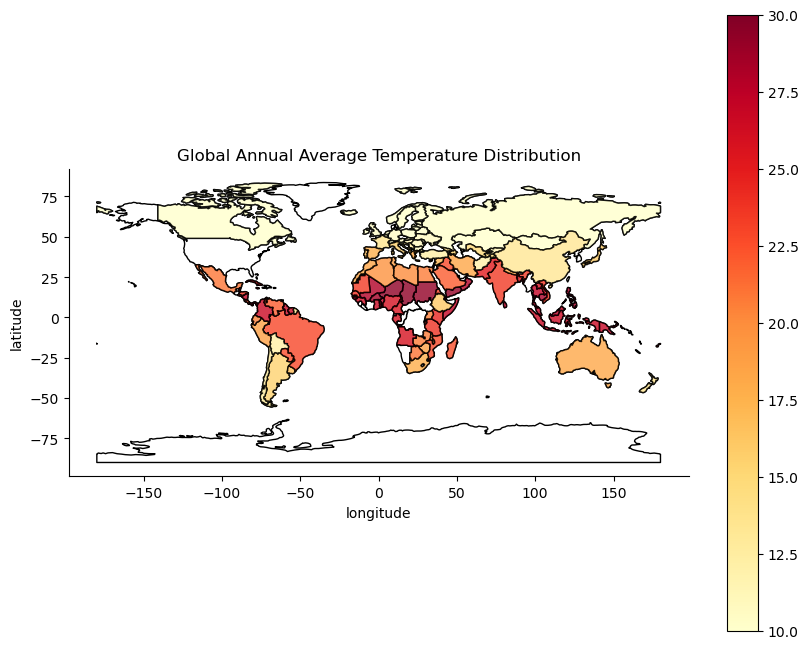

In [120]:
fig, gax = plt.subplots(figsize = (10,8))
world.plot(ax=gax, edgecolor='black',color='white')

plotting.at[190, 'Lat'] = 55.3781
plotting.at[190, 'Long'] = -3.4360

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plotting.plot(
    ax=gax, edgecolor='black', column='Year', legend=True, cmap='YlOrRd', alpha=0.8,
    vmin=10, vmax=30
)
gax.set_title('Global Annual Average Temperature Distribution')
plt.show()

> Note that for countries with more than one city data recorded in the previous `df` dataset, the temperature is calculated by taking the mean of all recorded cities.

As we can see, the global annual average temperature variation is huge; for example, we have Greenland with an annual average temperature lower than 10 °C while countries such as Sudan, Chad and Niger have annual average temperature higher than 30 |.

The map above allows us to conclude the following,

The annual average temperature is the lowest in **Europe** and **North America**. Then **Oceania** with an average annual temperature around 17.5. The temperature variation in **Asia** is significant compare to other continent as the annual average temperatures are mainly higher in costal area (Southeast Asia and Middle East) and lower in continental countries. **South America** has a high average annual temperature while **Africa** has the highest with several outliners.

Now let us move further and analyze the relation between population and confirmation count.

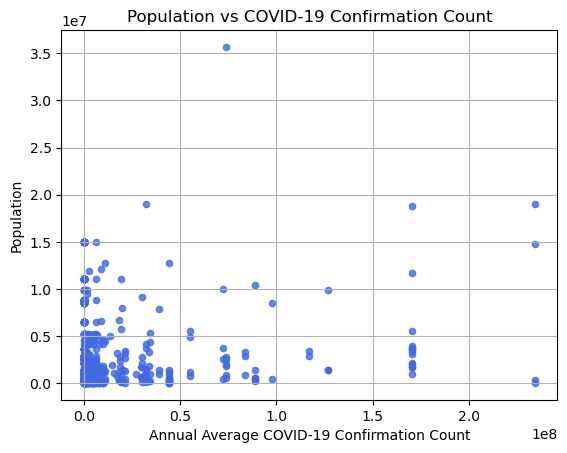

In [121]:
dff = pd.merge(geolocation, df, left_on=['city', 'country'], right_on=['City', 'Country'], how='inner')

fig, ax = plt.subplots()
dff.plot.scatter(ax=ax, x='Year COVID', y='population', color='royalblue', alpha=0.8)
ax.set_xlabel('Annual Average COVID-19 Confirmation Count')
ax.set_ylabel('Population')
plt.title('Population vs COVID-19 Confirmation Count')
plt.grid(True)
plt.show()

> Note that the plot did not drop the outliners, which will be dropped later. 

With the large variation, we can hardly see the trend. Let us drop the outliners as below,

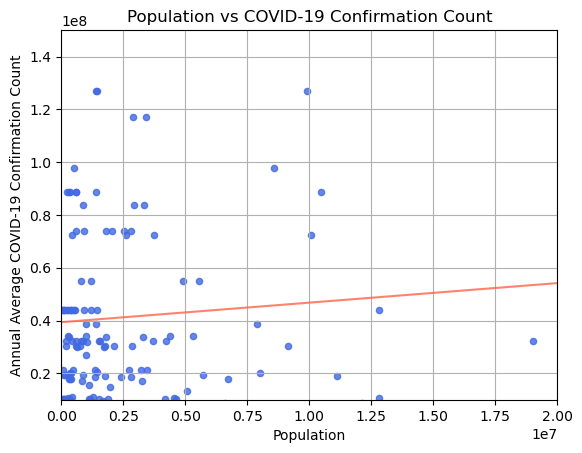

In [122]:
dff = pd.merge(geolocation, df, left_on=['city', 'country'], right_on=['City', 'Country'], how='inner')

fig, ax = plt.subplots()
dff.plot.scatter(ax=ax, x='population', y='Year COVID', color='royalblue', alpha=0.8)
ax.set_xlabel('Population')
ax.set_ylabel('Annual Average COVID-19 Confirmation Count')
ax.set_xlim(0, 20000000)  # population
ax.set_ylim(10000000, 150000000)  # Year COVID
plt.title('Population vs COVID-19 Confirmation Count')
plt.grid(True)

# linear regreesion
dff_reg = dff[dff['Year COVID']>10000000]
dff_reg = dff_reg[dff_reg['Year COVID']<150000000]
dff_reg = dff_reg[dff_reg['population']<20000000]
poplst = list(dff_reg['population'])
covidlst = list(dff_reg['Year COVID'])
coef = np.polyfit(poplst, covidlst, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(dff['population'], poly1d_fn(dff['population']), color='tomato', alpha=0.8, linewidth=1.5)

plt.show()

The graph above demonstrates a positive relation between population and the corresponding COVID-19 confirmation count (after excluding the outliners). The detailed mathematical relation is given as below, 

In [123]:
print(poly1d_fn)

 
0.7399 x + 3.938e+07


Which is summarized as the equation below, 

$\#CFM \approx 39380000 + 0.7399 P$

Where $\#CFM$ variable stands for the average annual COVID-19 confirmation count while $P$ represents the population count. This equation implies that for each unit increase in population, there will be a resulting 0.7399 increase in the confirmation count. 

This regression line seems to be a low-bias estimator for the plot shown as below, 

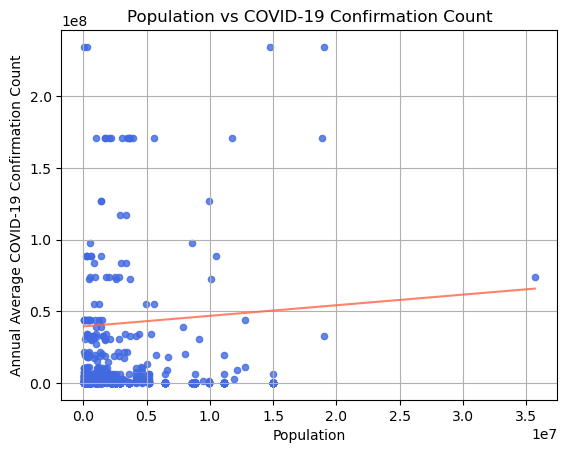

In [124]:
dff = pd.merge(geolocation, df, left_on=['city', 'country'], right_on=['City', 'Country'], how='inner')

fig, ax = plt.subplots()
dff.plot.scatter(ax=ax, x='population', y='Year COVID', color='royalblue', alpha=0.8)
ax.set_xlabel('Population')
ax.set_ylabel('Annual Average COVID-19 Confirmation Count')
plt.title('Population vs COVID-19 Confirmation Count')
plt.grid(True)

# linear regreesion
dff_reg = dff[dff['Year COVID']>10000000]
dff_reg = dff_reg[dff_reg['Year COVID']<150000000]
dff_reg = dff_reg[dff_reg['population']<20000000]
poplst = list(dff_reg['population'])
covidlst = list(dff_reg['Year COVID'])
coef = np.polyfit(poplst, covidlst, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(dff['population'], poly1d_fn(dff['population']), color='tomato', alpha=0.8, linewidth=1.5)

plt.show()

With the aggregate trend intuitively fitting the regression line. However, let us calculate the statistics.

Let us first calculate the **Error Sum of Squares** with equation given as below,

$SSE = \sum e_i = \sum (y_i - \hat{y}_i)^2$

Where $e_i$ is the unit residual, $y_i$ is the actual value of the unit while $\=y_i$ is its expected value (predicted by the mode).

SSE is the geometric summation of the difference in the actual value and the expected value.

In [125]:
dff_stats = dff_reg.copy()
dff_stats['expected COVID count'] = poly1d_fn(dff_stats['population'])
dff_stats['geometric unit difference'] = (dff['Year COVID'] - dff_stats['expected COVID count'])**2
SSE = dff_stats['geometric unit difference'].sum()
print(SSE)

1.0391849625049302e+17


From above, the **Error Sum of Squares** of this regression line is $1.0391849625049302 * 10^{17}$. This captures the geometric summation of all prediction error.

Now let us find the **Total Sum of Squares**, given as below,

$SST = \sum (y_i - \=y)^2$

Where $y_i$ is the actual unit value and $\=y$ is the mean value. SST captures the total amount of y-variance without the model. Codes below calculates the SST for the dataset.

In [126]:
dff_stats['geometric mean difference'] = (dff_stats['Year COVID'] - dff_stats['Year COVID'].mean())**2
SST = dff_stats['geometric mean difference'].sum()
print(SST)

1.0459001393322814e+17


SST is calculated as $8.553480388022359 * 10^{17}$. This allows us to calculate the **coefficient of determination**, $R^2$ for this model as,

$R^2 = 1 - \frac{SSE}{SST}$

In [127]:
print(1 - SSE/SST)

0.006420476080668869


Which implies that the regression model explains 0.6420476080668869% of the y-variance. This is not very accurate due to the huge variance in the y-variable, calculated as below,

$\=\sigma ^2 = \frac{SSE}{n-2}$

Where n is the number of observations. The calculation is shown as below,

In [128]:
SSE/len(dff_stats)-2

851790952872891.6

We conclude that the y-variance given dataset is $\=\sigma^2 \approx 851790952872891.6$, which is too large for a linear regression model to predict. Thus let us do a polynomial regression on the dataset instead.

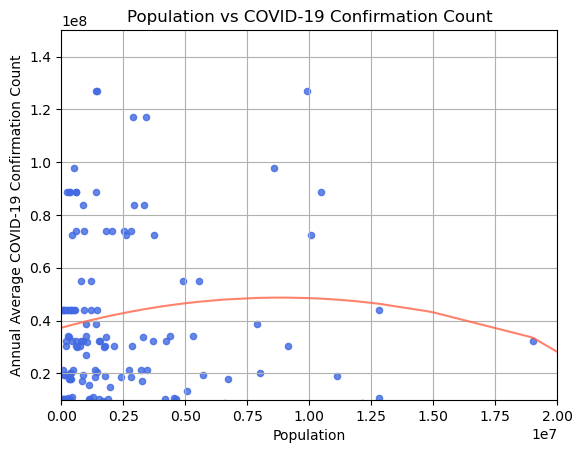

In [129]:
dff = pd.merge(geolocation, df, left_on=['city', 'country'], right_on=['City', 'Country'], how='inner')

fig, ax = plt.subplots()
dff.plot.scatter(ax=ax, x='population', y='Year COVID', color='royalblue', alpha=0.8)
ax.set_xlabel('Population')
ax.set_ylabel('Annual Average COVID-19 Confirmation Count')
ax.set_xlim(0, 20000000)  # population
ax.set_ylim(10000000, 150000000)  # Year COVID
plt.title('Population vs COVID-19 Confirmation Count')
plt.grid(True)

# polynomial regreesion
dff_reg = dff[dff['Year COVID']>10000000]
dff_reg = dff_reg[dff_reg['Year COVID']<150000000]
dff_reg = dff_reg[dff_reg['population']<20000000]
poplst = list(dff_reg['population'])
covidlst = list(dff_reg['Year COVID'])
coef = np.polyfit(poplst, covidlst, 2)
poly2d_fn = np.poly1d(coef)
plt.plot(dff['population'], poly2d_fn(dff['population']), color='tomato', alpha=0.8, linewidth=1.5)

plt.show()

From above, we see that this polynomial regression provides a roughly better estimation. The mathematical equation of this regression is given as below,

In [130]:
print(poly2d_fn)

            2
-1.468e-07 x + 2.59 x + 3.727e+07


Which stands for,

$\#CFM \approx -1.46798836 * 10^2 P^2 + 2.58969727P + 3.72656751*10^7$

Where P stands for population count and #CFM stands for COVID-19 confirmation count. Let us calculate the statistics as below,

In [131]:
dff_stats['expected COVID count'] = poly2d_fn(dff_stats['population'])
dff_stats['geometric unit difference'] = (dff['Year COVID'] - dff_stats['expected COVID count'])**2
SSE = dff_stats['geometric unit difference'].sum()
print(SSE)

1.0313164535304669e+17


Note that the SST is unchanged as the dataset total y-variance is not changed by the regression. Thus the $R^2$ can be calculated as below,

In [132]:
print(1-SSE/SST)

0.01394366943207892


This means that the polynomial regression model explains 1.394366943207892% of the y-variance. This is still not great enough, but much better than the previous simple linear regression model. 

<br>

----
## Final Project

### OLS Regression

Project one hypothesized and analyzed the relation between the COVID-19 mortality rate and numerous variables such as confirmation count, death toll, continents, GDP per capita and Omicron proportion. One important X-variable is the Omicron Proportion with the Y-variable as the COVID-19 mortality rate, defined previously as following, 

> $\color{red}{\text{ COVID-19 Mortality Rate}}$: the estimated probability *(sampled from the population)* that a COVID-19-infected individual will result in disease-related mortality.

The previous plot [here](#plot-omicron-variant-proportion-and-the-mortality-rate) suggests that the economic relation is non-linear and seems to be an exponential distribution. The natural reasoning of there exist no significant constant factor between the two variables (one Omicron-infected individual will not have a 100% fatality, nor fatality is resulted 100% from Omicron cases). As the mathematical relation between the GDP per capita and the COVID-19 mortality rate highly similar to the result from project two, the final project will first focus on the empirical correlation between the Omicron proportion of a country and the resulting COVID-19 mortality rate.


Project one hypothesized and analyzed the relation between the COVID-19 mortality rate and numerous variables such as confirmation count, death toll, continents, GDP per capita and Omicron proportion. One important X-variable is the Omicron Proportion with the Y-variable as the COVID-19 mortality rate, defined previously as following, 

> $\color{red}{\text{ COVID-19 Mortality Rate}}$: the estimated probability *(sampled from the population)* that a COVID-19-infected individual will result in disease-related mortality.

And another is the death toll as it is strongly correlated to the mortality rate due to the natural relation. 

The previous plot [here](#plot-omicron-variant-proportion-and-the-mortality-rate) suggests that the economic relation is non-linear and seems to be an exponential distribution between the omicron proportion and the mortality rate. The natural reasoning of there exist no significant constant factor between the two variables (one Omicron-infected individual will not have a 100% fatality, nor fatality is resulted 100% from Omicron cases). However, as simple linear regressions with two variables has a low accuracy (low $R^2$ as calculated in project three), as the final project we will analyze the mathematical relation between three variables.

With the new variable, the relation is hypothesized to be the following, an increase in the Omicron proportion will increase the mortality rate as it is a more deadly variant, and an increase in the death toll raises the mortality rate simply because of more fatality cases.

##### **OLS: Omicron Proportion and Death Toll vs Mortality Rate**

As explained in the previous section, the relation between the three variables is likely to be non-linear. Omicron proportion and death toll are chosen as the X-variables because Omicron is a more deadly variant (hypothetically resulting in a higher mortality rate) and death toll results in direct changes in the mortality rate, which means that a combination of both variables will explain the mortality rate more accurately than one variable.

The hypothetical relation among the variable is that an increase in either the Omicron variant proportion or the death toll will increase the mortality rate. The former variable will demonstrates a more inelastic relation. 

In [133]:
omicron_reg1 = country_death_confirm_population.copy()
omicron_reg1['Death Toll in 100k'] = omicron_reg1['Death Toll'] * (10**(-6))
omicron_reg1['const'] = 1
resok = sm.OLS(endog=omicron_reg1['Mortality Rate (%)'],
               exog=omicron_reg1[['const', 'Omicron Prop (%)', 'Death Toll in 100k']],
               missing='drop').fit()
stargazer = Stargazer([resok])
HTML(stargazer.render_html())

An equation can be summarized from data above, 

$$
MortalityRate(\%) = 0.0152 - 0.004OmicronProp + 0.345DeathToll
$$

Where death toll is measured in $1*10^6$. This equation implies that for each percentage increase in the Omicron proportion, the resulting mortality rate will fall by 0.004; for each $1*10^6$ increase in the death toll, the mortality rate increases by 0.345%.

The relation is consistent partially with the null hypothesis as the mortality rate shows a positive relation with respect to the death toll; however, the negative correlation between it and the Omicron proportion is unexpected. This can be reasoned by Omicron is a variant that appeared in the later part of the time horizon, where the infection treatment is already greatly improved (compared to the leading part of the time horizon), leading to a lower mortality rate. 

The coefficient of determinant, $R^2$, with manual calculation demonstrated in project three, implies that this model explains 6.5% of the total Y-variation, which is significantly higher than the previous model in project two and project three.

##### **OLS: Temperature, Population and the Mortality Rate**

In project three, we constructed the mathematical relation between the temperature and the confirmation count (note that in project three we are analyzing from the confirmation count perspective due to the project limitation) as following, 

$$
\#confirmation = 292089.76692336 + 9298279.88957761 temp
$$

And the relation between the population and mortality rate as, 

$$
\#confirmation = 39380000 + 0.7399 P
$$

The regression is likely to be non-linear due to the low $R^{2}$ shown in the previous simple linear model for the two variables; however, the previous model has already proven that the X-variables can explain the Y-variable (confirmation count).

To ensure the consistency of the three projects, we try to find the relation between temperature, population and the mortality rate as the Y-variable. 

Thus, to ensure the consistency of the three projects, we try to find the relation between temperature, population and the confirmation count using linear regression with three variable. The hypothetical relation here is that outlining temperatures will decrease the mortality rate due to the weakening virus, and higher population will result in higher mortality rate (observed from the relation from above). 

In [134]:
temp_pop_reg = pd.merge(dff, country_mortality_rate, on='Country', how='inner')
temp_pop_reg['const'] = 1
temp_pop_reg['Year'] = temp_pop_reg['Year'].astype(float)
temp_pop_reg.loc[:, 'Jan':'Year'] = temp_pop_reg.loc[:, 'Jan':'Year'].astype(float)
temp_pop_reg['population in million'] = temp_pop_reg['population'] * (10**-6)
temp_pop_reg_low = temp_pop_reg[temp_pop_reg['Population Status']=='Low']
temp_pop_reg_high = temp_pop_reg[temp_pop_reg['Population Status']=='High']
reslow = sm.OLS(endog=temp_pop_reg_low['Mortality Rate (%)'],
               exog=temp_pop_reg_low[['const', 'population in million', 'Year']],
               missing='drop').fit()
reshigh = sm.OLS(endog=temp_pop_reg_high['Mortality Rate (%)'],
               exog=temp_pop_reg_high[['const', 'population in million', 'Year']],
               missing='drop').fit()
resoverall = sm.OLS(endog=temp_pop_reg['Mortality Rate (%)'],
               exog=temp_pop_reg[['const', 'population in million', 'Year']],
               #exog=temp_pop_reg[['const', 'population in million', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']],
               missing='drop').fit()
stargazer = Stargazer([reslow, reshigh, resoverall])
HTML(stargazer.render_html())

From above, model (1) refers to low population countries, model (2) refers to high population countries, model (3) refers to countries in general (no population categorizing).

The mathematical relation for `low-population` countries is,

$$
MortalityRate(\%) = 0.295 + 0.025Temp + 0.117P
$$

Where $P$ represents the national population count in millions. 

And for `high-population` countries,

$$
MortalityRate(\%) = 1.222 + 0.014Temp + 0.034P
$$

Contradicting to the null hypothesis, the mortality rate is positively correlated with the temperature (instead of the outliners). For low-population countries, each Celsius degree increase in temperature raise the mortality rate by 0.025, and each unit rise in population increases the mortality rate by 0.117; for countries with high population, each temperature increase raises the mortality rate by 0.014 with each population unit rise increases the mortality rate by 0.034.

The mortality rate for low-population countries show a more inelastic relation towards the temperature while being more inelastic towards the population in high-population countries. This can be reasoned by high-population countries having a high population density which results in a situation that the increase in population will have more chance resulting in fatal outcome. 

For countries with low population, the 0.100 $R^2$ implies that the model explains 10% of the total Y-variation. For countries with high population, the model explains only 4.7% of the total Y-variation. Compare to the aggregate regression without specifying the population status, linear regressions that specifying population status brings a more accurate model for low-population countries but a less accurate model for high-population countries.

However, the $R^2$ is still relatively low, let us further increase the accuracy by dividing time horizon and find relations for each monthly time interval.

In [135]:
reslow = sm.OLS(endog=temp_pop_reg_low['Mortality Rate (%)'],
               exog=temp_pop_reg_low[['const', 'population in million', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                                      'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']],
               missing='drop').fit()
reshigh = sm.OLS(endog=temp_pop_reg_high['Mortality Rate (%)'],
               exog=temp_pop_reg_high[['const', 'population in million', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                                       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']],
               missing='drop').fit()
stargazer = Stargazer([reslow, reshigh])
HTML(stargazer.render_html())

> Remember that model (1) refers to low population countries, model (2) refers to high population countries, model (3) refers to countries in general (no population categorizing).

The equations are summarized as below, 

for countries with low population, the relation between the temperature, population and the resulting mortality rate is, 

$$
MortalityRate(\%) = 0.089 -0.230T_1 -0.049T_2 -0.105T_3 +0.269T_4 -0.118T_5 -0.056T_6 -0.183T_7 +0.301T_8 -0.132T_9 +0.130T_{10} -0.087T_{11} +0.295T_{12} +0.024P_{Y}
$$

Where $T_i$ represents the average temperature of the $i^{th}$ month and $P_{Y}$ is the annual population.

High population countries have a relation summarized as below, 

$$
MortalityRate(\%) = 0.184 -0.070T_1 +0.218T_2 -0.101T_3 -0.095T_4 +0.237T_5 +0.010T_6 -0.129T_7 -0.205T_8 +0.505T_9 -0.335T_{10} +0.211T_{11} -0.195T_{12} +0.004P_{Y}
$$

The new specification provides detailed mathematical relations, the 0.324 $R^2$ of low population implies that the model now explains 32.4% of the Y-variance. The 0.340 $R^2$ of high population implies that the model explains 34.0% of the total Y-variance. This detailed model provides us with **240%** accuracy increase in mortality rate prediction in low-population country and **623.4042253%** increase in high-population countries.

The mortality rate shows a more inelastic relation towards the population in low-population countries, which is consistent with the first model (hypothesis reasoned in the previous section). In low-population countries, mortality rate shows positive relations with the temperatures in Apr, Aug, Oct and Oct. In low-population countries, mortality rate shows positive relations with the temperatures in Feb, May, June, Sept and Nov. This could be hypothesized to relate to seasonal events that are related to tourism leading to seasonal population density change, etc.

Ideally with more population and COVID fatality case count data, the accuracy could be further improved, however, there is no data or websites we can find these detailed datasets without paying.

##### **2SLS: Latitude, Longitude, Temperature and the COVID-19 Mortality Rate**

The initial simple linear model between the Temperature, Population and the COVID-19 Mortality Rate has a low $R^2$, which indicates that the model is highly likely to be suffered from endogeneity. Thus, let us conduct a 2SLS (two stage least squares regression) on the variables.

Our null hypothesis is that `latitude` and `longitude` will impact the temperature (because latitude and longitude variations result in different weathers, which determine temperature), which will result in endogenous changes in the COVID-19 mortality rate, decreasing the total Y-vairance the OLS model can explain. Their relation is likely to be non-linear due to the geographical reasons. Same as before, we will run the regression categorizing the countries into high-population and low-population. 

We expect the temperature to increase as the latitude approaches 0 degree (as it is moving towards the equator), and shows an even distribution among the longitudes.

The 2SLS will have two stages, one finding the correlation between latitude, longitude and the temperature and another one using the stage one model prediction to obtain another regression, eliminate the endogeneity.

##### 2SLS Stage one:

Described previously, the first step is to find the relation between latitude, longitude and annual average temperature for both high-population and low-population countries.

In [136]:
ols_low = sm.OLS(temp_pop_reg_low['Year'],
                    temp_pop_reg_low[['const', 'lat', 'lng']],
                    missing='drop').fit()
stargazer = Stargazer([ols_low])
stargazer.custom_columns(['Low Population'],[1])
HTML(stargazer.render_html())

> Note that the OLS above uses `low-population` data. 

The relation is described as below, 

$$
Temp_{Low} = 21.939 - 0.144*Lat - 0.065*Long
$$

Now let us repeat the code on high-population countries then compare.

In [137]:
ols_high = sm.OLS(temp_pop_reg_high['Year'],
                    temp_pop_reg_high[['const', 'lat', 'lng']],
                    missing='drop').fit()
stargazer = Stargazer([ols_high])
stargazer.custom_columns(['High Population'],[1])
HTML(stargazer.render_html())

> Note that the OLS above uses `high-population` data. 

$$
Temp_{High} = 16.301 - 0.124*Lat + 0.015*Long
$$

Contradicting to the null hypothesis, the linear models show a negative relation between the temperature and the latitude for both high-population and low-population countries. However, low-population temperatures show negative relations toward the longitude while high-population temperatures show positive. 

Using these relations, we can enter the second stage of our 2SLS model.

##### 2SLS Stage Two:

As mentioned before, we will use the prediction from stage one models to rerun the OLS onto the variables. We expect similar correlation among the variables (an increase in either population or temperature will increase the mortality rate), however, but with higher $R^2$. If the $R^2$ is smaller than the previous model, we conclude that there exist minor (and insignificant) relation using latitude and longitude as instrument vairables.

In [138]:
temp_pop_reg_low['predicted temp'] = ols_low.predict()

res_low = sm.OLS(temp_pop_reg_low['Mortality Rate (%)'],
                 temp_pop_reg_low[['const', 'population in million','predicted temp']]).fit()
print(res_low.summary())

                            OLS Regression Results                            
Dep. Variable:     Mortality Rate (%)   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     9.183
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           0.000209
Time:                        19:24:36   Log-Likelihood:                -107.38
No. Observations:                 110   AIC:                             220.8
Df Residuals:                     107   BIC:                             228.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_1796/2249681724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_pop_reg_low['predicted temp'] = ols_low.predict()


The new mathematical relation is shown as below, 

$$
MortalityRate(\%)_{low} = -0.1935 + 0.1204*Pop + 0.0531*Temp
$$

Note that $Pop$ is population measured in millions.

Without the instrument variable, the previous simple linear regression model has a $R^2$ of 0.100. Compare to the new model with a $R^2$ of **0.147**, the total Y-variation that the model can explain had an increase. This also proves our null hypothesis that latitude and longitude create endogenious effects on the temperature which changes the mortality rate prediction accuracy for countries with low population.

In [139]:
temp_pop_reg_high['predicted temp'] = ols_high.predict()

res_high = sm.OLS(temp_pop_reg_high['Mortality Rate (%)'],
                 temp_pop_reg_high[['const', 'population in million','predicted temp']]).fit()
print(res_high.summary())

                            OLS Regression Results                            
Dep. Variable:     Mortality Rate (%)   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     20.04
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.22e-09
Time:                        19:24:36   Log-Likelihood:                -1011.9
No. Observations:                 796   AIC:                             2030.
Df Residuals:                     793   BIC:                             2044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.73

/var/folders/hr/jw82tbd55b5fbfgb3xd8p_b00000gn/T/ipykernel_1796/2765352161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_pop_reg_high['predicted temp'] = ols_high.predict()


The new model is summarized as below, 

$$
MortalityRate(\%)_{high} = 1.7319 + 0.0395*Pop - 0.0243*Temp
$$

Where $Pop$ is population measured in millions. The previous simple OLS model has a $R^2$ of 0.047, compare to the new mathematical relation obtained as above, the new model can explain 1% more variation than the previous model. Contradicting to the null hypothesis, this increase is relatively insignificant. Therefore, we conclude that in countries with high population, there is not much endogenous effects on the COVID-19 mortality rate brought by the latitude and longitude. This can be reasoned by the COVID-19 mortality rate of high-populated countries mainly depend on the technology, medical resource availability and other economic factors instead of environmental factors.

### Machine Learning: Regression Trees and Random Forecasts

Using machine learning techniques, we can further improve the mathematical models obtained previously. In this section, we will focus on analyzing the relation between `Omicron Proportion` and the `COVID-19 Mortality Rate` as different online journals had concluded different relations between them. 

Let us first define the objective function for this section as below, where $R$ is a region that contains all $MR$ values.

$$
\min_{j,s}[\sum_{i:x_{i,j} \le s, x_i \isin R1}(MR_i - \hat{MR}_{R1})^2 + \sum_{i:x_{i,j} > s, x_i \isin R2}(MR_i - \hat{MR}_{R2})^2]
$$

Where $MR$ represents the COVID-19 mortality rate, $R1$ and $R2$ are the two regions defined by $R$. ($i$, $j$ are indexes.)

The $y_i$ represents the actual observed value and $\hat{y}_{R1}$ represents the predicted value, so $(MR_i-\hat{MR}_{R1})^2$ and $(MR_i-\hat{MR}_{R2})^2$ are the square residual (difference between the predicted values and the observed values, then square). Our goal is to minimize the aggregate residual squares found by summing all the individual residual squares.

As we repeat the simulation for each of the two smaller regions, we stop when $|R|$ *= some chosen minimum size* or when *tree depth = chosen maximum*.

$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

Where $\alpha$ is defined as the **regularization parameter**. It can be chosen to be larger if we want a longer regression tree, vice versa.

In [140]:
X = country_death_confirm_population[['Omicron Prop (%)', 'Population']].copy()
X['Omicron Prop (%)'] = X['Omicron Prop (%)'].astype(float)
X['Population'] = X['Population'].astype(float)
y = country_death_confirm_population['Mortality Rate (%)']
from sklearn import tree
omi_mr_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
y_pred_tree = omi_mr_tree.predict(X)
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y, y_pred_tree))

MSE: 0.010464898572977806


Described previously, MSE (Mean Square Error) is calculated by the following equation, 

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where $\hat{y}_i$ is the predicted value of $y$ (in this case, the COVID-19 mortality rate) and $y_i$ is the observed value. As the MSE is very low, we suppose that the model will have a significantly higher accuracy compare to the previous OLS model.

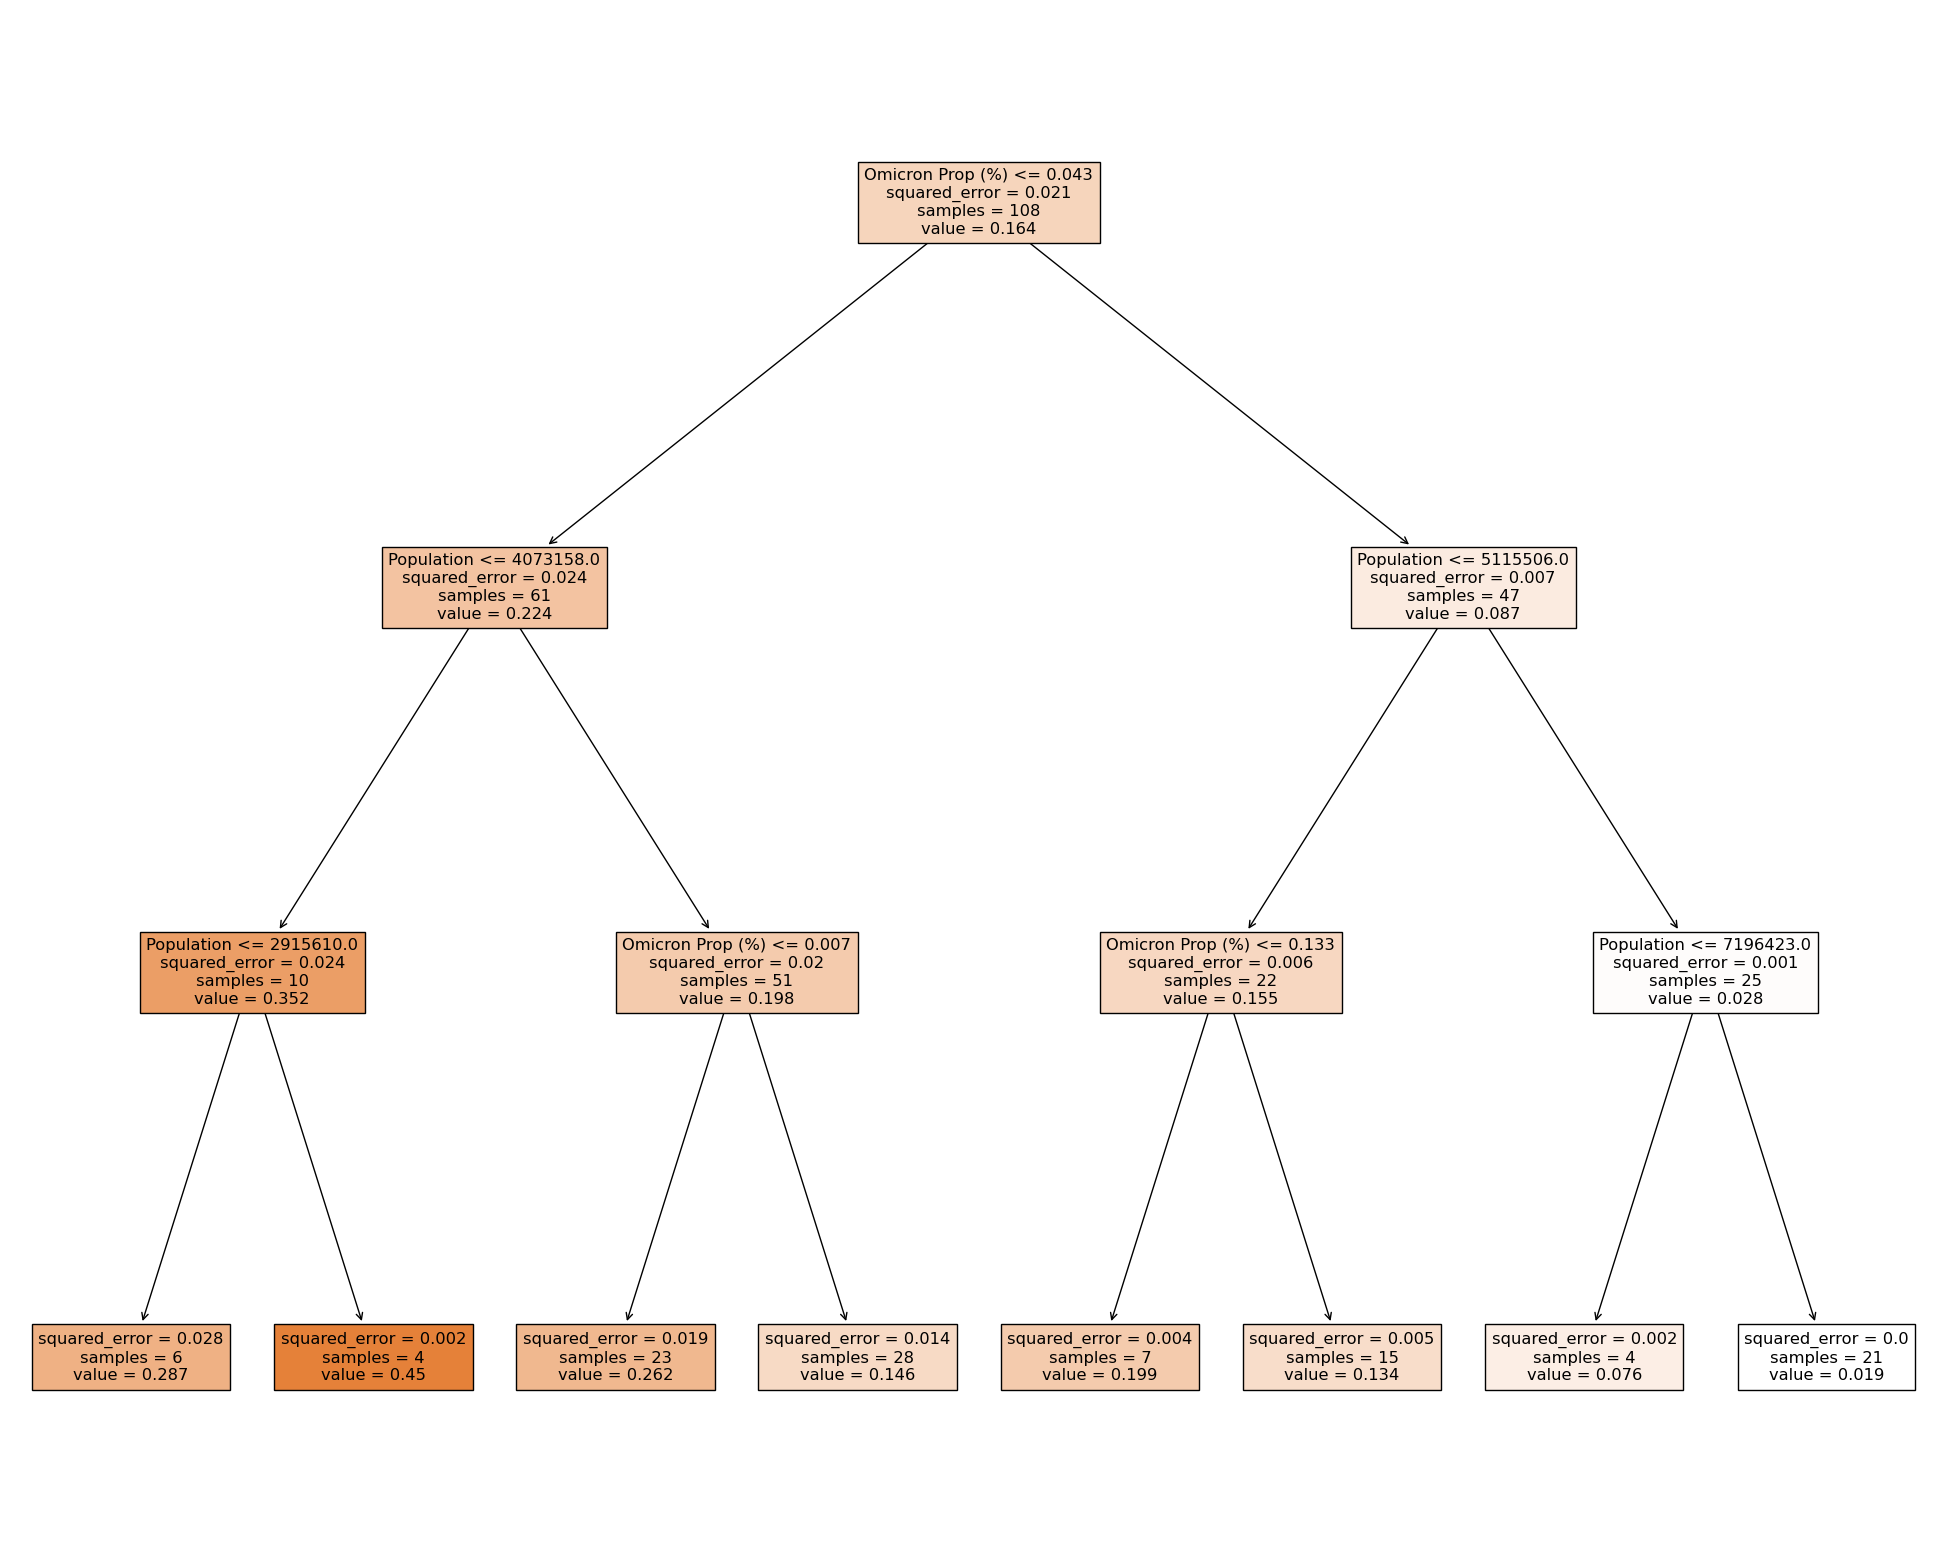

In [141]:
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(omi_mr_tree, feature_names=X.columns, filled=True)

The depth is chosen to be three to minimize the MSE.

The regression tree is demonstrated as above, with **MSE** of 0.010464898572977806, which means the aggregate residual square summation is 0.010464898572977806. This proves the accuracy increase compare to the previous OLS model which can only explain about 6% of the total Y-variation. 

A regression tree is a form of decision tree which improves the overall regression accuracy. From above, we can see the aggregate dataset is categorized into two nodes first (population $\le$ 4073158 or population $\le$ 5115506), and then further categorized into two other nodes, etc.

The mathematical relation is further detailed visualized as below,

In [142]:
# import numpy as np

# import plotly.graph_objects as go
# # activate plot theme
# import qeds
# qeds.themes.mpl_style();
# plotly_template = qeds.themes.plotly_template()
# colors = qeds.themes.COLOR_CYCLE

# # Simulate some data and plot it
# n = 1000
# Xsim = np.random.rand(n,2)
# def Ey_x(x):
#     return 1/3*(np.sin(5*x[0])*np.sqrt(x[1])*np.exp(-(x[1]-0.5)**2))
# #np.apply_along_axis applys a function (Ey_x here) to 1-D slices along the given axis which is Xsim here
# ysim = np.apply_along_axis(Ey_x, 1, Xsim) + np.random.randn(n)*0.1

# def surface_scatter_plot(X,y,f, xlo=0., xhi=1., ngrid=50,
#                          width=860, height=700, f0=Ey_x, show_f0=False):
#     scatter = go.Scatter3d(x=X[:,0],y=X[:,1],z=y,
#                            mode='markers',
#                            marker=dict(size=2, opacity=0.3)
#     )
#     xgrid = np.linspace(xlo,xhi,ngrid)
#     ey = np.zeros((len(xgrid),len(xgrid)))
#     ey0 = np.zeros((len(xgrid),len(xgrid)))
#     colorscale = [[0, colors[0]], [1, colors[2]]]
#     for i in range(len(xgrid)):
#         for j in range(len(xgrid)):
#             ey[j,i] = f([xgrid[i],xgrid[j]])
#             ey0[j,i]= f0([xgrid[i],xgrid[j]])
#     surface = go.Surface(x=xgrid, y=xgrid, z=ey, colorscale=colorscale, opacity=1.0)
#     if (show_f0):
#         surface0 = go.Surface(x=xgrid, y=xgrid, z=ey0, opacity=0.8, colorscale=colorscale)
#         layers = [scatter, surface, surface0]
#     else:
#         layers = [scatter, surface]
#     fig = go.FigureWidget(
#         data=layers,
#         layout = go.Layout(
#             autosize=True,
#             scene=dict(
#                 xaxis_title='X1',
#                 yaxis_title='X2',
#                 zaxis_title='Y'
#             ),
#             width=width,
#             height=height,
#             template=plotly_template,
#         )
#     )
#     return fig


# fig=surface_scatter_plot(
#     Xsim, ysim, lambda x: omi_mr_tree.predict([x]), show_f0=True
# )
# fig

> Note that the model above cannot be rendered to HTML. Feel free use the Notebook Version on Github https://github.com/robinasaki/Analyzing-the-COVID-19-Mortality-Rate-with-respect-to-Different-Variables.git.

Where X1 stands for `Omicron Proportion in percentage`, X2 for `Population` and Y for `COVID-19 Mortality Rate`. The regression tree predictions are piece-wise-constant on rectangle regions. This model explains the actual value trend intuitively, and minimize the square distance between the predicted values and the actual values.

##### Compare with the OLS model

Compare to the previous OLS, the regression tree provides more information and provide mathematical relation for each subgroup. From the graph, we can see that countries with low population and low Omicron proportion have the lowest COVID-19 mortality rate, and countries with low-to-mid Omicron proportion and mid-to-high population have the highest COVID-19 mortality rate. Whenever the Omicron proportion is too high or too low, the mortality rate decreases. These are observations contradicting the null hypothesis which we cannot observe from a simple OLS.

<br>

### Conclusion:

The paper above analyze the COVID-19 severity from mainly the perspective of the mortality rate. In project one, we used simple data query and visualization to analyze the intuitive relation between the mortality rate and the potential X-variables. Out of all confirmation count, death count, countries, individual wealth and omicron proportion, no significant relation were shown between the COVID-19 confirmation count and the COVID-19 mortality rate. In terms of the COVID-19 death count, its rise will lead to an increase in the COVID-19 mortality rate; however, it is not too significant compared to other factors. COVID-19 morality rate does vary among countries; moreover, countries with the least GDP per capita tend to have a lower mortality rate, and vice versa. Finally, most countries have both a low omicron proportion and a low mortality rate. Countries with a high omicron proportion tend to have a low mortality rate, and countries with a low omicron proportion tend to have a high mortality rate. 

In the project two, we used heat maps to analyze the distribution of the factors, further analyzing the project one message, which states that economic factors play important roles regarding the global COVID-19 mortality rate variation among countries, from three perspectives: the roles of GDP, governmental mode and literacy rate toward the COVID-19 mortality rate, with the latter divided into two categories "high population" and "low population." We find that in countries with significant populations, the mortality rate decreases as the GDP increases. Its trend line is more inelastic and contains more outliner. Regarding governmental mode, parliamentary democratic governments minimize the mortality rate, and military dictatorship governments maximize it. If the country has a higher literacy rate, it tends to have a lower mortality rate; however, the difference is not huge. On the other hand, in countries with small populations, a GDP increase tends to increase the mortality rate. A country with a smaller population also tends to have a lower GDP and mortality rate. Royal dictatorship governments minimize the mortality rate, and civilian dictatorship governments maximize the mortality rate. Its literacy rate trendline is highly similar to countries with higher populations. Furthermore, we focused on the relationship between GDP and the mortality rate and created four graphical interpretations. From the first graph, countries with the top 25 GDP are primarily distributed in North America, Europe and Oceania. There are also significant numbers of top GDP countries in South America, Southeast Asia and Middle East. However, among the list of top five GDPs, three of them are Asian countries. From the second graph, we divided the globe into continents. North America shows no significant correlation between the GDP and the COVID-19 mortality rate. Compared to North America, South America tend to have a higher overall mortality rate. However, in South America, countries with a high GDP tend to have a lower mortality rate than countries like Peru and Ecuador. Therefore, in South America, countries with high GDP tend to have a lower COVID-19 mortality rate and tend not to be mortality hotspots. Overall, European countries tend to have a high GDP and a low mortality rate. Because there are no visible countries with a high mortality rate, we cannot conclude the trend. Thus, we can just take "overall, European countries tend to have a high GDP and a low mortality rate" as a conclusion. Things start to sour in Africa; this continent contains many mortality rate hotspots with fewer high-GDP countries. The mortality rate variation is higher than in any other continent. Although high-GDP countries in Africa tend to have a lower mortality rate than the hotspots, they still have a high mortality rate compared to the rest of the world. Asia is another continent with a high variance. We can see Thailand and Vietnam with lower mortality rates and countries such as China and Indonesia with higher mortality rates. However, the overall mortality rate is lower in regions such as the Middle East and Russia. Thus, in Asia, we see no clear trend between the GDP and the COVID-19 mortality rate except in the Middle East, where countries with a higher GDP tend to have a greater mortality rate. Oceania tends to have both a high GDP and a low mortality rate. As it contains only a few countries, we cannot conclude the inter-country trend between the variables. In the Americas, countries with a lower GDP tend to have a stabilized, medium mortality rate. In Europe, there is not much difference in the mortality rate. In Africa, countries with a lower GDP tend to have a lower mortality rate. The trend is the same in Asia where a smaller GDP brings a lower mortality rate. And Oceania overly has a low mortality rate. The final graph focuses on the mortality rate variation within the US. From the graph, states with top GDP tend to have a high overall mortality rate but do not possess extreme values. States with bottom GDP tend to have a lower overall mortality rate. We can conclude in the Mainland US, the east coast has a lower overall mortality rate. Countries with higher GDP tend to have a higher mortality rate; however, the outliners for the mortality rate are usually not those for GDP. Thus, although GDP plays an essential role in affecting the COVID-19 mortality rate in the mainland US, other factors exist too.

In project three, we began focusing scrapping the dataset from the website and providing the mathematical relation among the variables. We demonstrated the relations between the COVID-19 confirmation count and variables such as population and temperature change. We found that the confirmation count is positively correlated with the mortality rate and the temperature in a relatively elastic way.

The accuracy of the models were significantly improved in the final project. We changed the Y-variable back to the mortality rate for the consistency and re-ran all the project three models with this variable. We first used multivariable OLS to determine the relation between the COVID-19 mortality rate and variables such as temperature and population, Omicron proportion and death toll, and conducted a 2SLS using latitude and longitude as the instrumental variables. The results show that in low-population countries, the mortality rate shows a positive relation between the temperature, population, death toll, and a negative relation towards the Omicron proportion; in high-population countries, the mortality rate is positively correlated with the population and death toll, but negatively correlated with temperature and the Omicron proportion. The final part introduced a regression tree model and categorized the observations into groups with extreme high accuracy, we see that the countries with low population and low Omicron proportion have the lowest COVID-19 mortality rate, and countries with low-to-mid Omicron proportion and mid-to-high population have the highest COVID-19 mortality rate. Whenever the Omicron proportion is too high or too low, the mortality rate decreases. These are observations contradicting the null hypothesis which we cannot observe from a simple OLS.

We had made some great improvement throughout this research paper. However, in future projects, I expect myself to run regressions on datasets with more observations, have more regression types and improve the consistency of the paper. This paper has limitations such as not targeting specific regions, the topics are too broad too. The future project will have more detailed structured outlines before implementation, with (hopefully) no limitation on the formatting. 

To answer the main question "what are the important economic factors resulting in the COVID-19 global mortality rate variation and how", different from other literature, this report analyzed numerous factors and their relations towards the COVID-19 mortality rate using various methods from shallow to deep, so that audiences with different mathematical background could all understand the paper. The results were constructed among important economic variables with both broad overview and niche review, which is different from other literature. For example, there is simple bar plot focusing on the governmental mode, and there is machine learning regression tree focusing on the detailed model.

----
## References

**Data Source Reference:**

- *panelEnshengDongaHongruDuaLaurenGardneraEnvelope, A. links open overlay, EnshengDonga, a, HongruDua, &amp; LaurenGardneraEnvelope. (2020, February 19). An interactive web-based dashboard to track COVID-19 in Real time. The Lancet Infectious Diseases. Retrieved February 1, 2023, from https://www.sciencedirect.com/science/article/pii/S1473309920301201?via%3Dihub*

**Citation (APA7):**

1. *Covid-19 data explorer. Our World in Data. (n.d.). Retrieved February 3, 2023, from https://ourworldindata.org/explorers/coronavirus-data-explorer*
2. *Ontario's COVID-19 response: A history of announced measures, 2020-2022. JD Supra. (n.d.). Retrieved February 3, 2023, from https://www.jdsupra.com/legalnews/ontario-s-covid-19-response-a-history-1280608/*
3. *GDP per capita (current US$). Data. (n.d.). Retrieved February 3, 2023, from https://data.worldbank.org/indicator/NY.GDP.PCAP.CD*
4. *Key facts about Monaco. (n.d.). Retrieved February 3, 2023, from https://monacodc.org/monacohome.html*
5. *Encyclopædia Britannica, inc. (2023, January 4). Liechtenstein. Encyclopædia Britannica. Retrieved February 3, 2023, from https://www.britannica.com/place/Liechtenstein*
6. *Countries where COVID-19 has spread. Worldometer. (n.d.). Retrieved February 3, 2023, from https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/*
7. *Security violation. (n.d.). Retrieved February 3, 2023, from https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus/a-new-strain-of-coronavirus-what-you-should-know*
8. Mortality analyses. Johns Hopkins Coronavirus Resource Center. (n.d.). Retrieved March 2, 2023, from *https://coronavirus.jhu.edu/data/mortality*
9. *https://www.who.int/news-room/fact-sheets/detail/monkeypox*

**Data Source References**:
1. CSSEGISandData. (2022). COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. GitHub. https://github.com/CSSEGISandData/COVID-19


2. World Bank. (2021). Population, Total — Data. Worldbank.org. https://data.worldbank.org/indicator/SP.POP.TOTL


3. COVID-19 Variants Worldwide Evolution. (n.d.). Www.kaggle.com. Retrieved April 17, 2023,
from https://www.kaggle.com/datasets/gpreda/covid19-variants


4. World Bank. (2021a). GDP per capita (current US$) —
Data. Worldbank.org. https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

5. World Bank. (2021b). GDP (current US$) — Data. The World Bank. https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

6. Democracy-Dictatorship Index. (n.d.). www.kaggle.com. Retrieved April 17, 2023,from https://www.kaggle.com/datasets/mathurinache/democracy-dictatorship-index

7. Duncalfe, L. (2022, February 4). lukes/ISO-3166-Countries-with-Regional-Codes. GitHub. https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes


8. The World Bank. (2020). Literacy rate, adult total (% of people ages 15 and above) —Data. Worldbank.org.
https://data.worldbank.org/indicator/SE.ADT.LITR.ZS


9. US GDP by State 1997-2020. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/davidbroberts/us-gdp-by-state-19972020


10. Global Temperature (Scraping)
https://en.wikipedia.org/wiki/List of cities by average temperature.